In [ ]:
! ls

'C:\Users\RRK\Desktop\Northumbria\ML Assesment\new1.csv'   new13.csv   new18.csv   new30.csv
 drive							   new14.csv   new19.csv   new9.csv
 duplicate_rows.csv					   new15.csv   new20.csv   results
 logs							   new16.csv   new21.csv   sample_data
 new12.csv						   new17.csv   new22.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing








**<font color=”blue”> 1. Import Libraries </font>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_csv("drive/MyDrive/big_data/Airline_Review.csv")

In [ ]:
df.describe(include="all")

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
count,3580,2815,2816,3575.000000,1270,3580,3580,3580,3579
unique,2764,1174,744,NaN,2,2570,3506,203,13
top,David Ellis,Aug-15,Economy Class,NaN,Trip Verified,British Airways customer review,I really do not have the energy to write very ...,A320,Economy Class
freq,44,25,846,NaN,1067,952,2,342,676
mean,NaN,NaN,NaN,4.790490,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.170323,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(3580, 9)

In [ ]:
df.size

32220

In [ ]:
df.isna().sum()


Passanger_Name       0
Flying_month       765
Route              764
Rating               5
Verified          2310
Review_title         0
Review_content       0
Traveller_type       0
Class                1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [ ]:
df.nunique()

Passanger_Name    2764
Flying_month      1174
Route              744
Rating              10
Verified             2
Review_title      2570
Review_content    3506
Traveller_type     203
Class               13
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3575    False
3576    False
3577    False
3578    False
3579    False
Length: 3580, dtype: bool

In [ ]:
columns_to_check = ['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Review_title','Review_content','Traveller_type', 'Class' ]

# Finding and displaying duplicate rows based on specified columns
duplicate_rows = df[df.duplicated(subset=columns_to_check, keep=False)]

# Displaying only the duplicate rows
print(duplicate_rows)

        Passanger_Name      Flying_month            Route  Rating Verified  \
2412    Richard Hodges  Tampa to Gatwick   Business Class     8.0      NaN   
2413    Richard Hodges        LHR to MIA  Premium Economy     6.0      NaN   
2440    Richard Hodges  Tampa to Gatwick   Business Class     8.0      NaN   
2442    Richard Hodges        LHR to MIA  Premium Economy     6.0      NaN   
2838   Michael Stanley               NaN              NaN     2.0      NaN   
...                ...               ...              ...     ...      ...   
3502      Charlie Harm               NaN              NaN     4.0      NaN   
3508  Robert Sakakeeny               NaN              NaN     7.0      NaN   
3509      Peter Bedson               NaN              NaN     5.0      NaN   
3515  Robert Sakakeeny               NaN              NaN     7.0      NaN   
3516      Peter Bedson               NaN              NaN     5.0      NaN   

                         Review_title  \
2412    comfortable, i

In [ ]:
duplicate_rows.to_csv('duplicate_rows.csv', index=False)

In [ ]:
df.duplicated().sum()

74

In [ ]:
df.describe(include='all')

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
count,3580,2815,2816,3575.000000,1270,3580,3580,3580,3579
unique,2764,1174,744,NaN,2,2570,3506,203,13
top,David Ellis,Aug-15,Economy Class,NaN,Trip Verified,British Airways customer review,I really do not have the energy to write very ...,A320,Economy Class
freq,44,25,846,NaN,1067,952,2,342,676
mean,NaN,NaN,NaN,4.790490,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.170323,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.count()

Passanger_Name    3580
Flying_month      2815
Route             2816
Rating            3575
Verified          1270
Review_title      3580
Review_content    3580
Traveller_type    3580
Class             3579
dtype: int64

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


# **Removing Duplicates values**

In [ ]:
columns_to_check = ['Passanger_Name', 'Flying_month', 'Route', 'Rating', 'Review_title', 'Review_content', 'Traveller_type', 'Class' ]

# Remove duplicate rows based on the specified columns
df_no_duplicates = df.drop_duplicates(subset=columns_to_check, keep='first')

# df_no_duplicates will contain the DataFrame with duplicate rows removed
df_no_duplicates


,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure
...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes


In [ ]:
df=df_no_duplicates

In [ ]:
df.dtypes['Flying_month']

dtype('O')

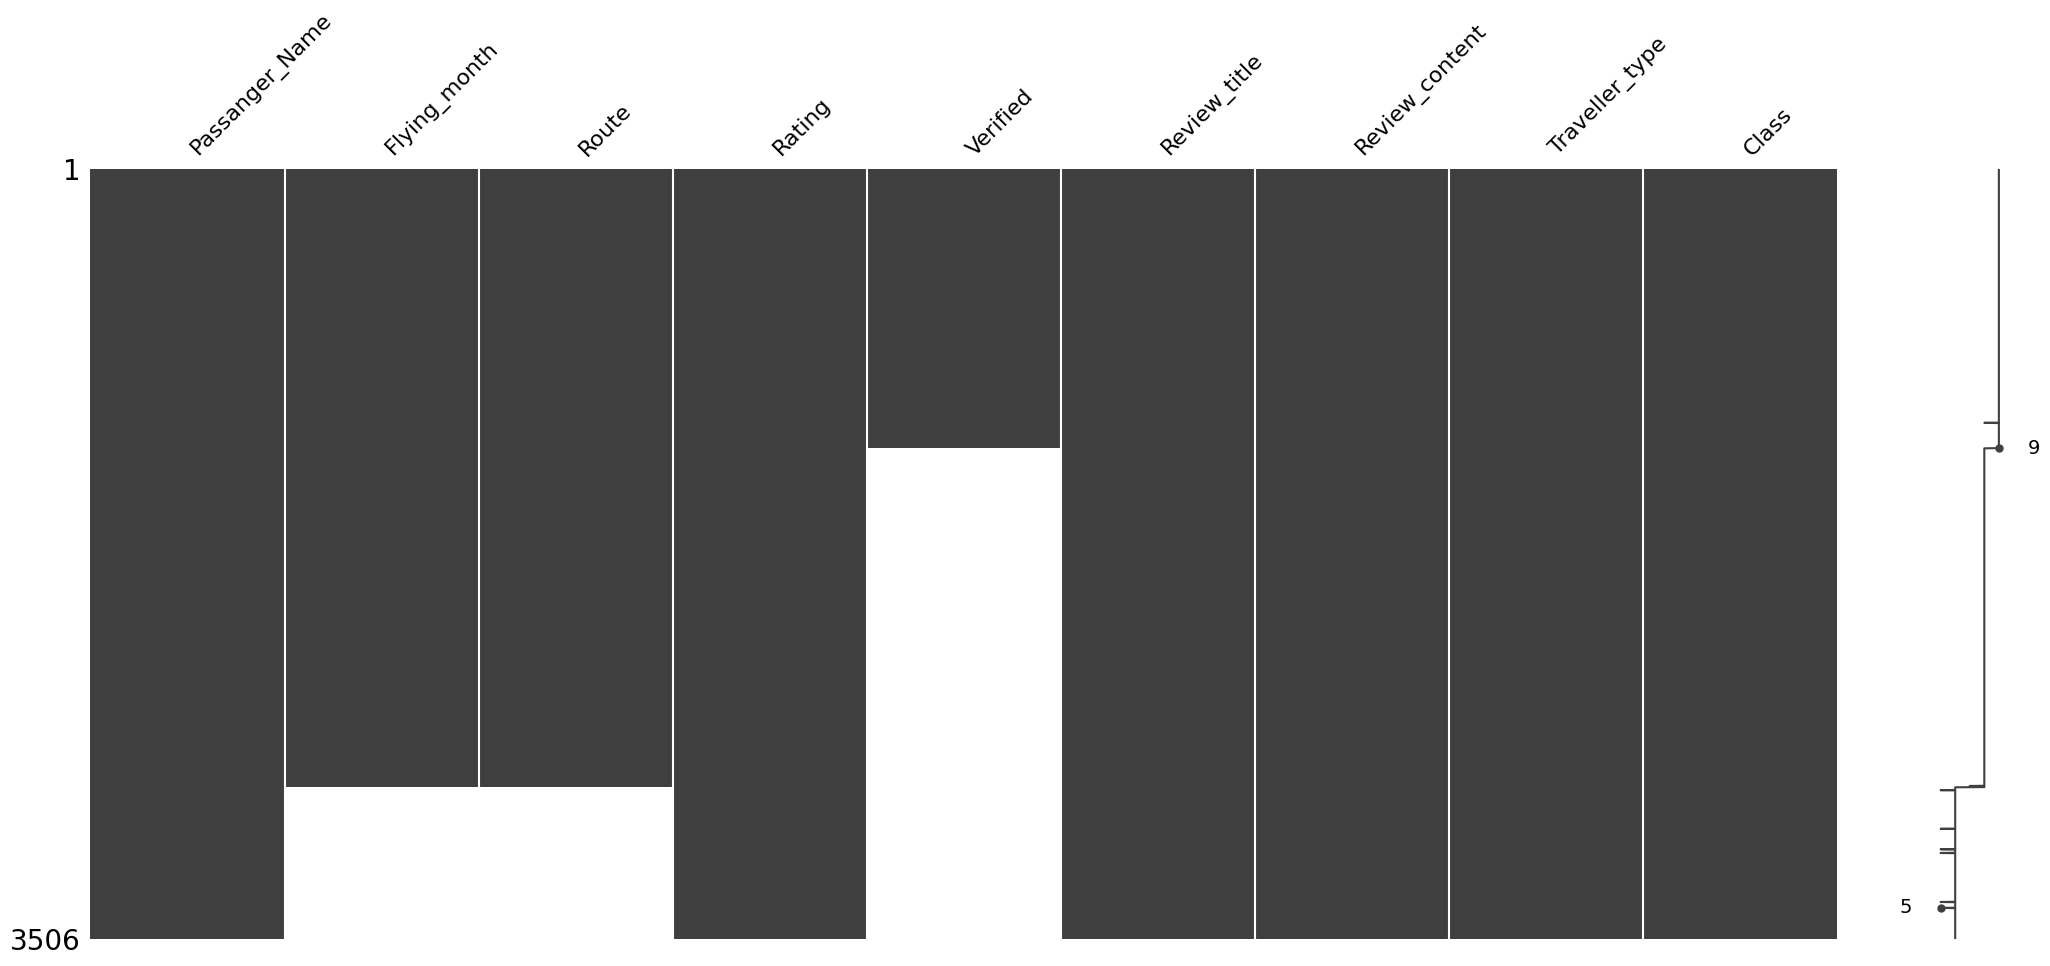

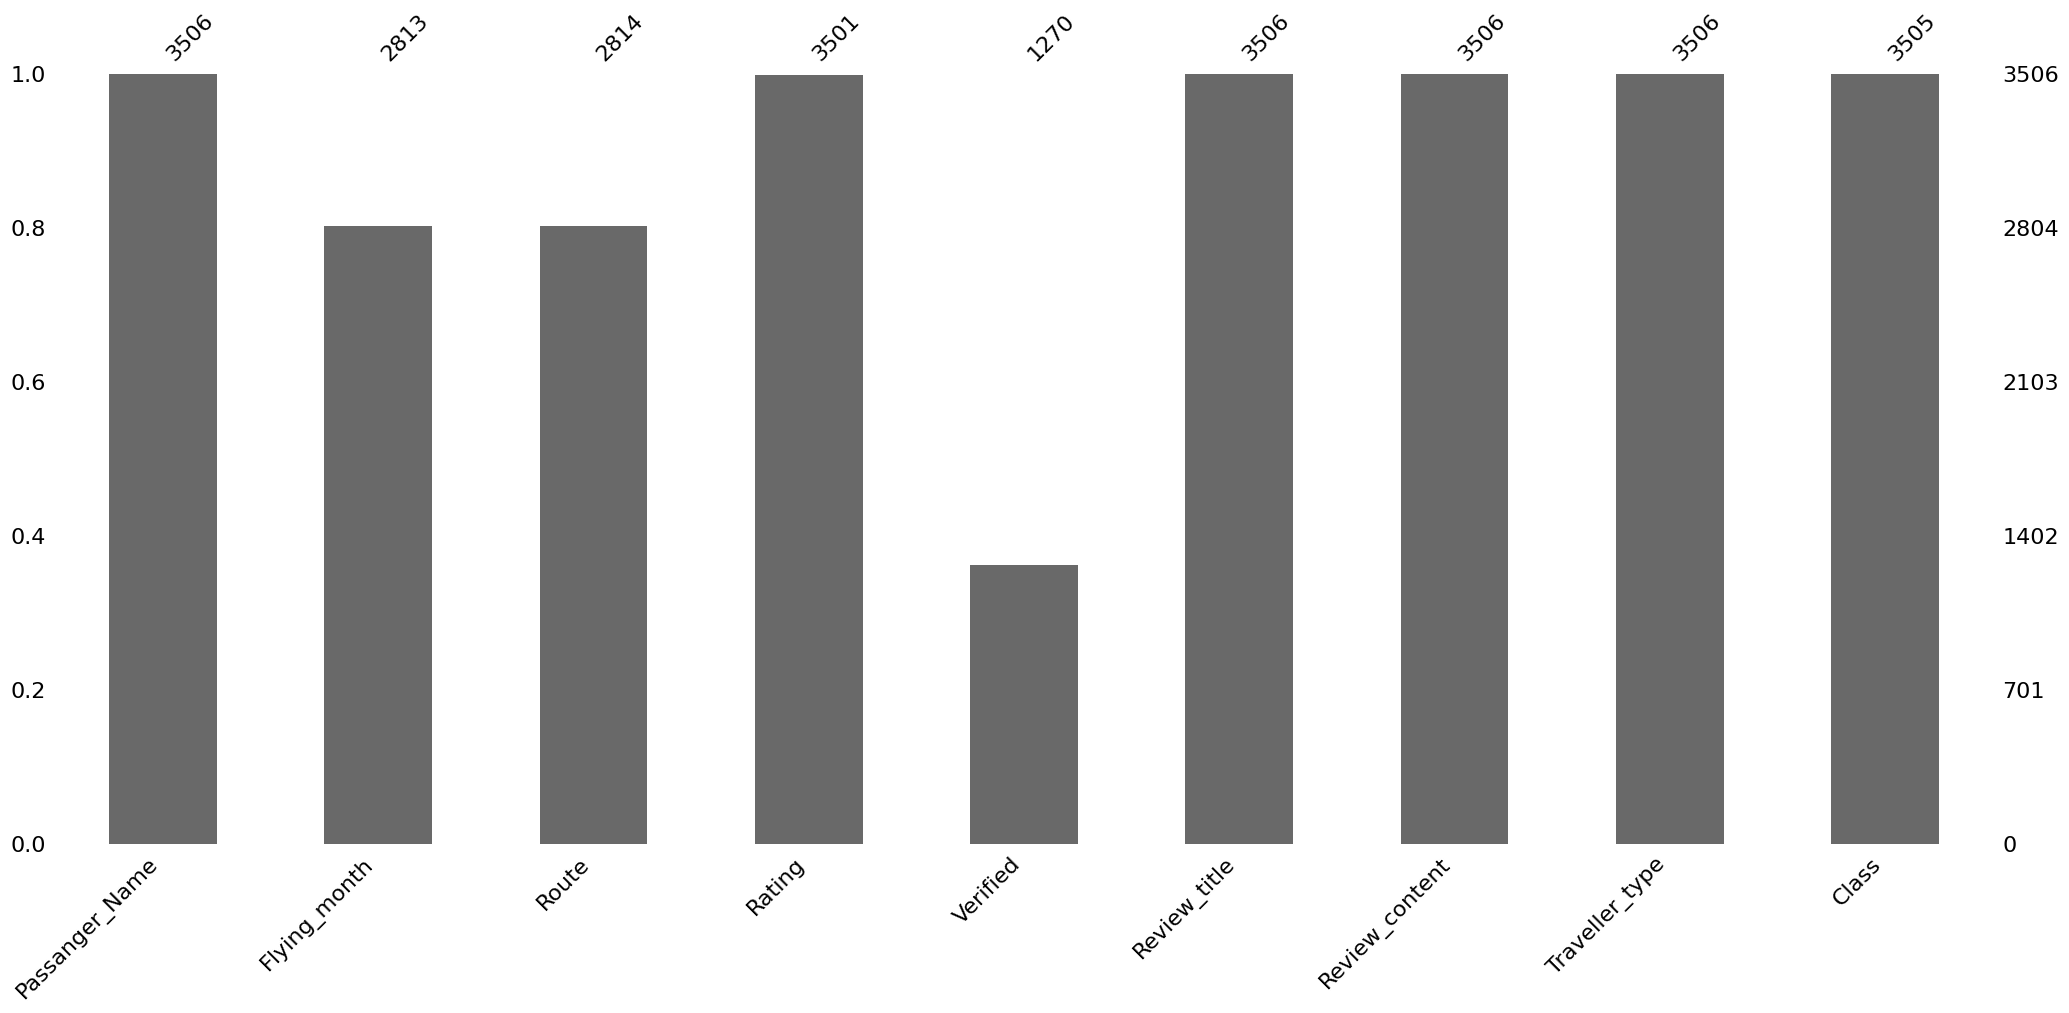

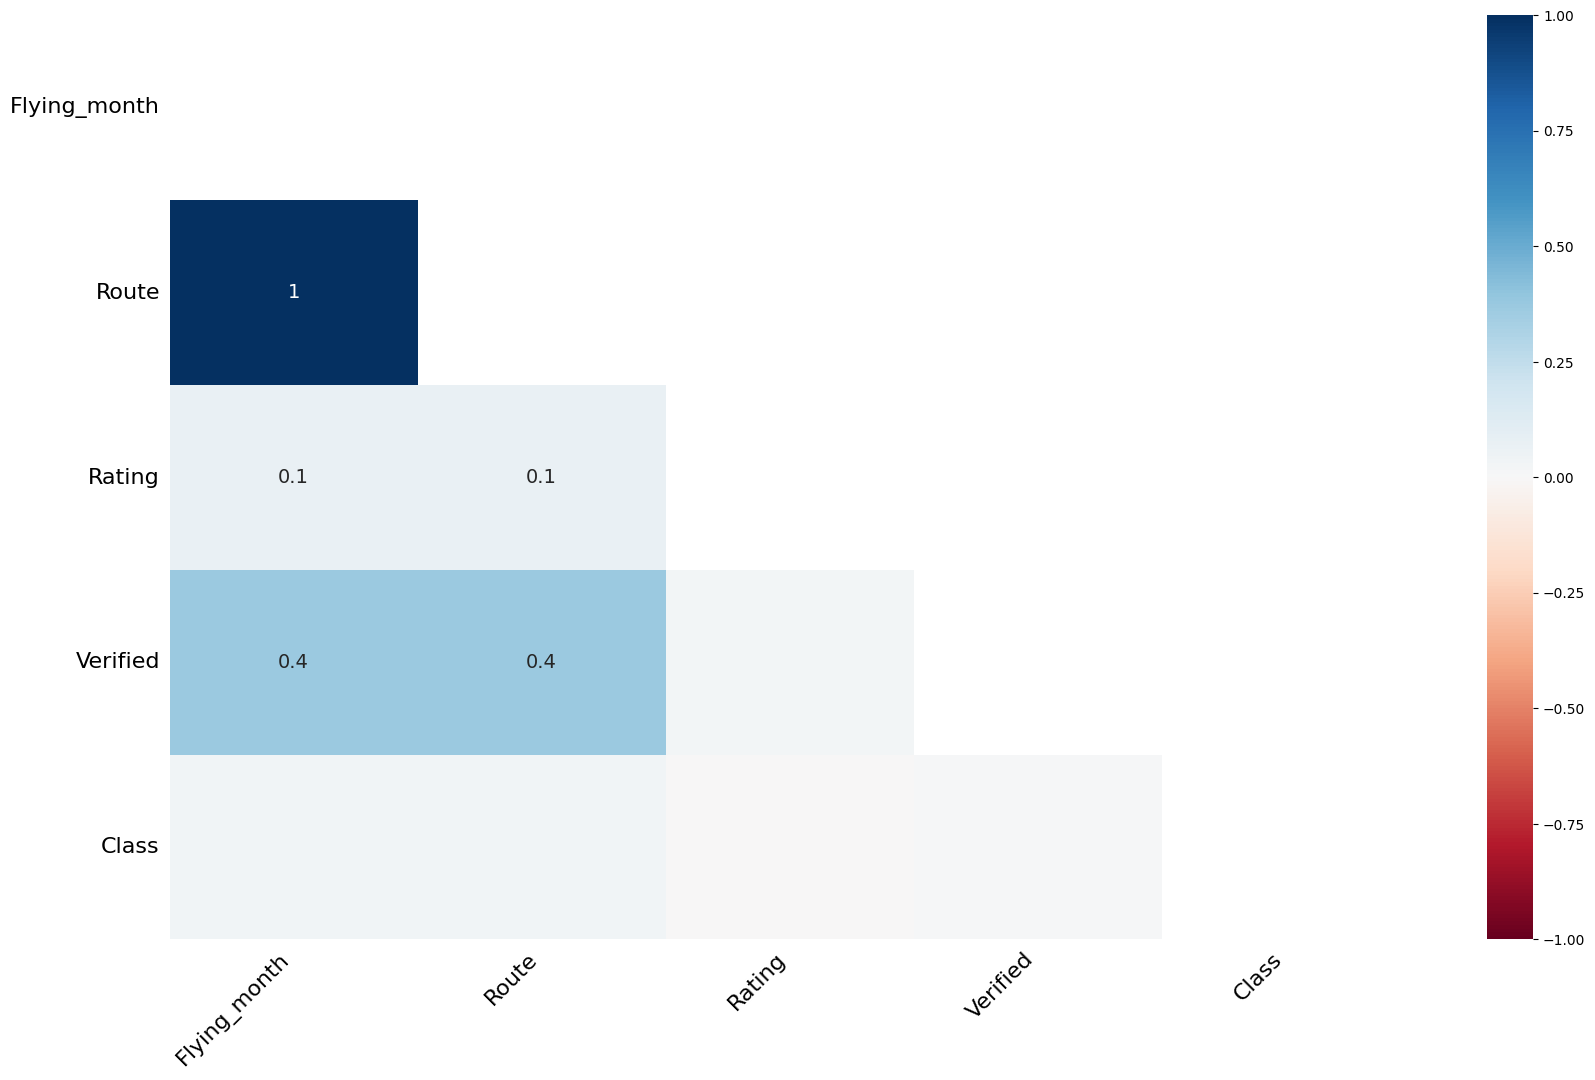

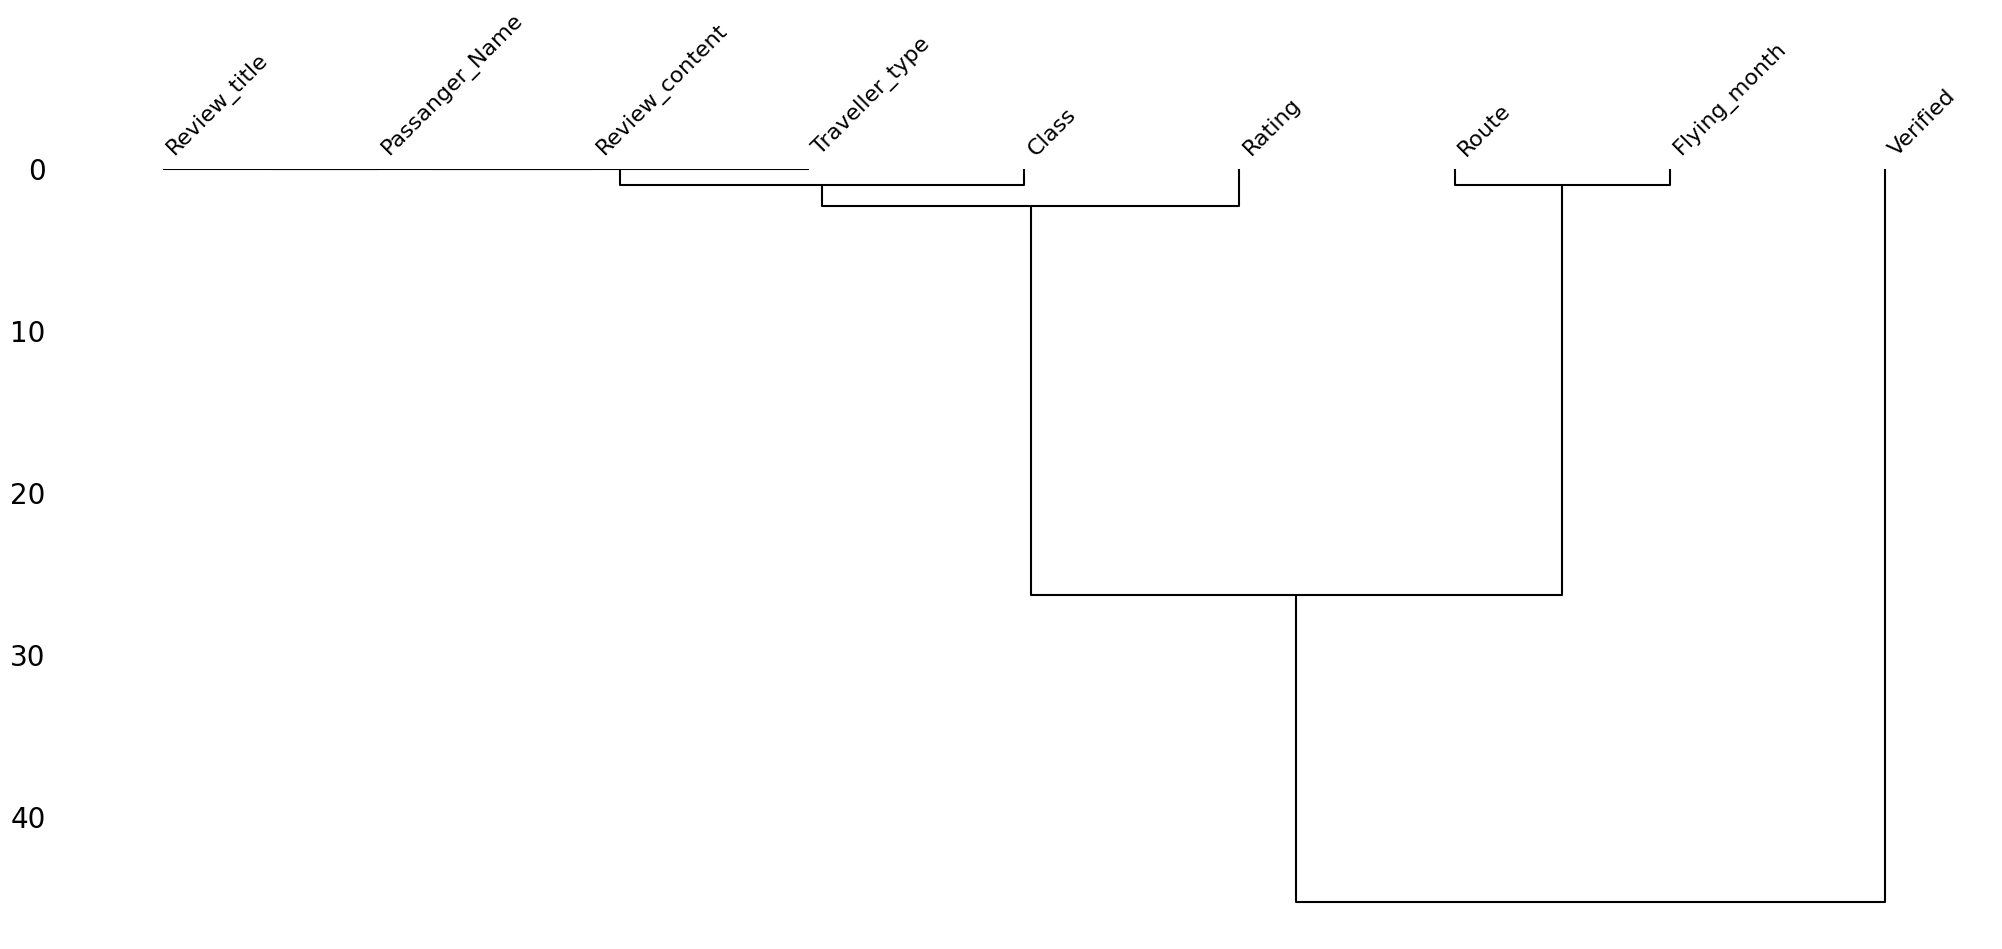

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()
msno.heatmap(df)
plt.show()
msno.dendrogram(df)
plt.show()

# Cleaning data for flying month column

In [ ]:

# Define a regular expression pattern for 'mmm-yy' format (e.g., 'Nov-23')
date_pattern = r'^[A-Z][a-z]{2}-\d{2}$'

# Filter rows that do not match the pattern
non_matching_dates = df[~df['Flying_month'].str.match(date_pattern, na=False)]

# Create a new column and copy non-matching values
df['Non_Date_Column'] = None  # Initialize the new column with None values
df.loc[non_matching_dates.index, 'Non_Date_Column'] = non_matching_dates['Flying_month']

<ipython-input-205-b9405600057f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Non_Date_Column'] = None  # Initialize the new column with None values


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Non_Date_Column
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN


In [ ]:
# Changing the name of the column from Non_Date_Column to New_route
df.rename(columns={'Non_Date_Column':'Route_copy'}, inplace=True)

<ipython-input-207-477723b8a813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Non_Date_Column':'Route_copy'}, inplace=True)


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN


In [ ]:
# Replacing all the values of date with np.nan from the Flying_month column
df.loc[~df['Flying_month'].str.match(date_pattern, na=False), 'Flying_month'] = np.nan

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None
2,E Lanewoski,NaN,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None
4,R Vines,NaN,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN


# Cleaning data for Route column

In [ ]:
# Define a regular expression pattern for 'mmm-yy' format (e.g., 'Nov-23')
date_pattern = r'^[A-Z][a-z]{2}-\d{2}$'

# Filter rows that do not match the pattern
non_matching_dates = df[df['Route'].str.match(date_pattern, na=True)]

# Create a new column and copy non-matching values
df['Flying_month_copy'] = None  # Initialize the new column with None values
df.loc[non_matching_dates.index, 'Flying_month_copy'] = non_matching_dates['Route']

<ipython-input-211-0dc0e9356fd6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flying_month_copy'] = None  # Initialize the new column with None values


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None
2,E Lanewoski,NaN,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum,None
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None
4,R Vines,NaN,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza,None
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN,NaN


In [ ]:
df.to_csv(r'C:\Users\RRK\Desktop\Northumbria\ML Assesment\new1.csv')

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None
2,E Lanewoski,NaN,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum,None
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None
4,R Vines,NaN,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza,None
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN,NaN


In [ ]:
df.loc[df['Route'].str.match(date_pattern, na=True), 'Route'] = np.nan

In [ ]:
df.to_csv(r'C:\Users\RRK\Desktop\Northumbria\ML Assesment\new1.csv')

In [ ]:
# Define a regular expression pattern to extract specific class names
class_pattern = r'(?i)(?:Economy Class|Premium Economy|Business Class|First Class)'

# Filter rows that do not match the pattern
matching_class = df[df['Route'].str.match(class_pattern, na=True)]

# Create a new column and copy non-matching values
df['Class_copy'] = None  # Initialize the new column with None values
df.loc[matching_class.index, 'Class_copy'] = matching_class['Route']


<ipython-input-217-ecb6a400e801>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class_copy'] = None  # Initialize the new column with None values


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None
2,E Lanewoski,NaN,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum,None,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None
4,R Vines,NaN,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza,None,Business Class
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN,NaN,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN,NaN,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN,NaN,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN,NaN,NaN


In [ ]:
# Replacing all the values of class with np.nan from the route column
df.loc[df['Route'].str.match(class_pattern, na=True), 'Route'] = np.nan

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum,None,Business Class
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza,None,Business Class
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN,NaN,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN,NaN,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN,NaN,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN,NaN,NaN


In [ ]:
df.to_csv(r'C:\Users\RRK\Desktop\Northumbria\ML Assesment\new1.csv')

# Cleaning data for class column

In [ ]:
# Copy the 'class' column to a new column named 'traveller_type_copy'
df['traveller_type_copy'] = df['Class'].copy()

<ipython-input-222-b9ac88c8e2e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traveller_type_copy'] = df['Class'].copy()


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,Business Class
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum,None,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,Economy Class
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza,None,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN,NaN,NaN,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN,NaN,NaN,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN,NaN,NaN,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN,NaN,NaN,yes


In [ ]:
# Checking the unique values in the traveller_type_copy column
unique_values_column = df['traveller_type_copy'].unique()
print(unique_values_column)

['Economy Class' 'Business Class' 'Solo Leisure' 'Family Leisure'
 'Business' 'Couple Leisure' 'Premium Economy' 'London to Malaga'
 'First Class' 'LHR to ORD' 'Los Angeles to London to Paris to Rome ' 'no'
 'yes' nan]


In [ ]:
# List of strings to be removed from 'traveller_type_copy' column
strings_to_remove = ['Economy Class', 'Business Class','Business', 'Premium Economy',
                     'London to Malaga','First Class', 'LHR to ORD', 'Los Angeles to London to Paris to Rome ',
                     'no','yes']

# Remove multiple specific string values from 'traveller_type_copy' column
for string in strings_to_remove:
    df['traveller_type_copy'] = df['traveller_type_copy'].replace(string, 'None')


<ipython-input-225-c084c1c057f8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traveller_type_copy'] = df['traveller_type_copy'].replace(string, 'None')


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure,Heathrow to Bodrum,None,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure,London City to Ibiza,None,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,NaN,NaN,NaN,None
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,NaN,NaN,NaN,None
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,NaN,NaN,NaN,None
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,NaN,NaN,NaN,None


In [ ]:
# Checking the unique values in the traveller_type_copy column
unique_values_column = df['traveller_type_copy'].unique()
print(unique_values_column)

['None' 'Solo Leisure' 'Family Leisure' 'Couple Leisure' nan]


In [ ]:
# Copy the 'class' column to a new column named 'traveller_type_copy'
df['Route_copy2'] = df['Class'].copy()

<ipython-input-228-e818e65d8076>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Route_copy2'] = df['Class'].copy()


In [ ]:
# Checking the unique values in the traveller_type_copy column
unique_values_column = df['Route_copy2'].unique()
print(unique_values_column)

['Economy Class' 'Business Class' 'Solo Leisure' 'Family Leisure'
 'Business' 'Couple Leisure' 'Premium Economy' 'London to Malaga'
 'First Class' 'LHR to ORD' 'Los Angeles to London to Paris to Rome ' 'no'
 'yes' nan]


In [ ]:
# List of strings to be removed from 'Route_copy2' column
strings_to_remove = ['Economy Class', 'Business Class', 'Solo Leisure', 'Family Leisure','Business', 'Couple Leisure',
                     'Premium Economy', 'First Class', 'no', 'yes']

# Remove multiple specific string values from 'Route_copy2' column
for string in strings_to_remove:
    df['Route_copy2'] = df['Route_copy2'].replace(string, 'None')

<ipython-input-230-5ad73d7d3855>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Route_copy2'] = df['Route_copy2'].replace(string, 'None')


In [ ]:
# Checking the unique values in the traveller_type_copy column
unique_values_column = df['Route_copy2'].unique()
print(unique_values_column)

['None' 'London to Malaga' 'LHR to ORD'
 'Los Angeles to London to Paris to Rome ' nan]


In [ ]:
# Copy the 'class' column to a new column named 'Yes_No_copy'
df['Yes_No_copy'] = df['Class'].copy()

<ipython-input-232-346fbd632a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yes_No_copy'] = df['Class'].copy()


In [ ]:
# List of strings to be removed from 'Yes_No_copy' column
strings_to_remove = ['Economy Class', 'Business Class', 'Solo Leisure', 'Family Leisure', 'Business', 'Couple Leisure',
                     'Premium Economy', 'London to Malaga','First Class', 'LHR to ORD', 'Los Angeles to London to Paris to Rome ']

# Remove multiple specific string values from 'Yes_No_copy' column
for string in strings_to_remove:
    df['Yes_No_copy'] = df['Yes_No_copy'].replace(string, 'None')

<ipython-input-233-592fe92c111f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Yes_No_copy'] = df['Yes_No_copy'].replace(string, 'None')


In [ ]:
# Checking the unique values in the Yes_No_copy column
unique_values_column = df['Yes_No_copy'].unique()
print(unique_values_column)

['None' 'no' 'yes' nan]


In [ ]:
# Checking the unique values in the Class column
unique_values_column = df['Class'].unique()
print(unique_values_column)

['Economy Class' 'Business Class' 'Solo Leisure' 'Family Leisure'
 'Business' 'Couple Leisure' 'Premium Economy' 'London to Malaga'
 'First Class' 'LHR to ORD' 'Los Angeles to London to Paris to Rome ' 'no'
 'yes' nan]


In [ ]:
# List of strings to be removed from 'Class' column
strings_to_remove =['Solo Leisure', 'Family Leisure', 'Couple Leisure', 'London to Malaga', 'LHR to ORD',
                    'Los Angeles to London to Paris to Rome ', 'no', 'yes']

# Remove multiple specific string values from 'Class' column
for string in strings_to_remove:
    df['Class'] = df['Class'].replace(string, 'None')

<ipython-input-236-4103ca713560>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class'] = df['Class'].replace(string, 'None')


In [ ]:
# Checking the unique values in the Class column
unique_values_column = df['Class'].unique()
print(unique_values_column)

['Economy Class' 'Business Class' 'None' 'Business' 'Premium Economy'
 'First Class' nan]


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,None,London City to Ibiza,None,Business Class,Family Leisure,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,None,NaN,NaN,NaN,None,None,no
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,None,NaN,NaN,NaN,None,None,no
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,None,NaN,NaN,NaN,None,None,no
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,None,NaN,NaN,NaN,None,None,yes


In [ ]:
df.to_csv(r'C:\Users\RRK\Desktop\Northumbria\ML Assesment\new1.csv')

# Cleaning data for Traveller_type column

In [ ]:
# Checking the unique values in the Traveller_type column
unique_values_column = df['Traveller_type'].unique()
print(unique_values_column)

['Solo Leisure' 'Couple Leisure' 'A321 neo' 'Embraer 190' 'A350'
 'Boeing 737' 'Family Leisure' 'Business' 'Boeing 787' 'Boeing 777'
 'Boeing 777-300' 'A320' 'A320 Finnair' 'A319' 'Boeing 787-9' 'Dreamliner'
 'Boeing 777-200' 'Boeing 787 / A320' 'A321' 'A321Neo' 'A380'
 'Boeing 777 / A320' 'A321neo' 'Boeing 777-300ER' 'Boeing 787-8'
 'A320, A380' 'A350-1000' 'Boeing 787-10' 'A320neo' 'A320-200'
 'Business Class' 'A320, Boeing 787' 'A321 Neo' 'Boeing 737 800'
 'A320 / Boeing 777' 'Embraer' 'Boeing 777-200ER' 'Boeing 787-900'
 'A321-neo' 'A322' 'Boeing 737-800' 'A320 Neo' 'A320NEO' 'A330' 'A230'
 'A321NEO' 'Boeing 747' 'Embraer 195' 'Boeing 747-400' 'A380-800'
 'Boeing 777-200 / 747-400' 'Boeing 777 - 200' 'Boeing 787-9, A320-200'
 'EMB190' 'A319 / Boeing777' 'A340-300, A320' 'A321-200' 'B777-200'
 'A320 neo' 'A319 / Boeing 789' 'Boeing 777-200 and A319'
 'A321 / Boeing 787-9' 'Boeing 777 / 747' 'A319 / Boeing 777'
 'B747-400 in retro' 'A319/A320' 'B737-400 / A380 / A319' 'Boeing 744'
 '

In [ ]:
# Create a new column 'Type of Flight' and initialize it with NaN
df['Type_of_flight'] = np.nan

# Condition to move specific values to Type_of_flight column from Traveller_type column
conditions = ~df['Traveller_type'].isin(['Solo Leisure', 'Family Leisure', 'Couple Leisure'])
df.loc[conditions, 'Type_of_flight'] = df.loc[conditions, 'Traveller_type']
df['Traveller_type'] = df['Traveller_type'].where(~conditions, '')

<ipython-input-241-1bebbe943cf9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_of_flight'] = np.nan
<ipython-input-241-1bebbe943cf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Traveller_type'] = df['Traveller_type'].where(~conditions, '')


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,Economy Class
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,Economy Class
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,Economy Class
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,Business Class


In [ ]:
# Checking the unique values in the Traveller_type column
unique_values_column = df['Type_of_flight'].unique()
print(unique_values_column)

[nan 'A321 neo' 'Embraer 190' 'A350' 'Boeing 737' 'Business' 'Boeing 787'
 'Boeing 777' 'Boeing 777-300' 'A320' 'A320 Finnair' 'A319' 'Boeing 787-9'
 'Dreamliner' 'Boeing 777-200' 'Boeing 787 / A320' 'A321' 'A321Neo' 'A380'
 'Boeing 777 / A320' 'A321neo' 'Boeing 777-300ER' 'Boeing 787-8'
 'A320, A380' 'A350-1000' 'Boeing 787-10' 'A320neo' 'A320-200'
 'Business Class' 'A320, Boeing 787' 'A321 Neo' 'Boeing 737 800'
 'A320 / Boeing 777' 'Embraer' 'Boeing 777-200ER' 'Boeing 787-900'
 'A321-neo' 'A322' 'Boeing 737-800' 'A320 Neo' 'A320NEO' 'A330' 'A230'
 'A321NEO' 'Boeing 747' 'Embraer 195' 'Boeing 747-400' 'A380-800'
 'Boeing 777-200 / 747-400' 'Boeing 777 - 200' 'Boeing 787-9, A320-200'
 'EMB190' 'A319 / Boeing777' 'A340-300, A320' 'A321-200' 'B777-200'
 'A320 neo' 'A319 / Boeing 789' 'Boeing 777-200 and A319'
 'A321 / Boeing 787-9' 'Boeing 777 / 747' 'A319 / Boeing 777'
 'B747-400 in retro' 'A319/A320' 'B737-400 / A380 / A319' 'Boeing 744'
 'A380 / Boeing 777' 'Boeing 747 400' 'Boeing 77

In [ ]:
# Create a new column 'class_copy2' and initialize it with NaN
df['Class_copy2'] = np.nan

# Move values from Type_of_flight to 'class_copy2' based on conditions
conditions = df['Type_of_flight'].isin(['Business', 'Business Class', 'First Class','Economy Class', 'Premium Economy', 'no'])
df.loc[conditions, 'Class_copy2'] = df.loc[conditions, 'Type_of_flight']
df.loc[conditions, 'Type_of_flight'] = np.nan

<ipython-input-244-27a47817ea3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Class_copy2'] = np.nan


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight,Class_copy2
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN,NaN
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo,NaN
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,NaN,Business Class


In [ ]:
# Checking the unique values in the Traveller_type column
unique_values_column = df['Class_copy2'].unique()
print(unique_values_column)

[nan 'Business' 'Business Class' 'First Class' 'Economy Class'
 'Premium Economy' 'no']


In [ ]:
# Count occurrences of a particular value in the 'Class_copy2' column
value_counts = df['Class_copy2'].value_counts()
print(value_counts)

Economy Class      304
Business Class     263
Business           193
Premium Economy     77
First Class         49
no                   1
Name: Class_copy2, dtype: int64


In [ ]:
# Print the count of a specific value, for example, 'Solo Leisure'
print("Count of 'no':", value_counts.get('no', 0))

Count of 'no': 1


In [ ]:
df.to_csv(r'C:\Users\RRK\Desktop\Northumbria\ML Assesment\new1.csv')

# **PB**

# Merging the columns

In [ ]:
# Replace missing values in 'Merged_route' with values from 'Route_copy' only if 'Merged_route' is NaN or None
df['Merged_route'] = df.apply(lambda row: row['Route_copy'] if pd.isnull(row['Route']) else row['Route'], axis=1)

<ipython-input-250-50a57dd284ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merged_route'] = df.apply(lambda row: row['Route_copy'] if pd.isnull(row['Route']) else row['Route'], axis=1)


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight,Class_copy2,Merged_route
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,New Orleans to London
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN,NaN,London to Amman
2,E Lanewoski,NaN,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo,NaN,Heathrow to Bodrum
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,Amman to London
4,R Vines,NaN,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190,NaN,London City to Ibiza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,NaN,Business Class,NaN


In [ ]:
df.to_csv(r'new9.csv')

In [ ]:
# Copy 'yes' and 'no' values from 'Merged_route' to 'Yes_No_copy' column
mask_yes = df['Merged_route'] == 'yes'
mask_no = df['Merged_route'] == 'no'

# Copy 'yes' and 'no' values from 'Merged_route' column to 'Yes_No_copy' column
df.loc[mask_yes, 'Yes_No_copy'] = 'yes'
df.loc[mask_no, 'Yes_No_copy'] = 'no'

In [ ]:
# Replace 'Merged_route' values that are 'no' with corresponding 'Route_copy2' values
mask = df['Merged_route'] == 'no'
df.loc[mask, 'Merged_route'] = df.loc[mask, 'Route_copy2']

In [ ]:
df.to_csv(r'new9.csv')

In [ ]:
# Copy values from 'Flying_month_copy' to 'Flying_month' where 'Flying_month' is missing
mask_missing = df['Flying_month'].isnull()  # Filter for missing values in 'Flying_month'
df.loc[mask_missing, 'Flying_month'] = df['Flying_month_copy']

In [ ]:
# Check for missing values in 'Traveller_type' and copy values from 'traveller_type_copy' column
mask_missing_traveller = df['Traveller_type'].isnull()  # Filter for missing values in 'Traveller_type'
df.loc[mask_missing_traveller, 'Traveller_type'] = df.loc[mask_missing_traveller, 'traveller_type_copy']

In [ ]:
# Check the data types of the columns
print(df[['Traveller_type', 'traveller_type_copy']].dtypes)

Traveller_type         object
traveller_type_copy    object
dtype: object


In [ ]:
df.to_csv(r'new12.csv')

In [ ]:
# Create a new column 'Merge_class' with values from 'Class' and 'Class_copy'
df['Merge_class'] = df['Class']
df.loc[df['Class'].isnull(), 'Merge_class'] = df['Class_copy']

<ipython-input-260-e59ca93eac8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merge_class'] = df['Class']


In [ ]:
df.to_csv(r'new13.csv')

In [ ]:
# Create a new column and copy values from 'Traveller_type' and 'traveller_type_copy'
# Copy values from 'traveller_type_copy' to 'Merge_traveller_type' where 'Merge_traveller_type' is missing
df['Merge_traveller_type'] = df['Traveller_type'].fillna(df['traveller_type_copy'])
df['Merge_traveller_type'] = df['Traveller_type']
mask = df['Merge_traveller_type'].isnull() | df['Merge_traveller_type'].eq('')

df.loc[mask, 'Merge_traveller_type'] = df.loc[mask, 'traveller_type_copy']


<ipython-input-262-0246f7fe83a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merge_traveller_type'] = df['Traveller_type'].fillna(df['traveller_type_copy'])
<ipython-input-262-0246f7fe83a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merge_traveller_type'] = df['Traveller_type']


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight,Class_copy2,Merged_route,Merge_class,Merge_traveller_type
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,New Orleans to London,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN,NaN,London to Amman,Business Class,Couple Leisure
2,E Lanewoski,None,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo,NaN,Heathrow to Bodrum,None,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,Amman to London,Economy Class,Solo Leisure
4,R Vines,None,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190,NaN,London City to Ibiza,None,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,None,None
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,None,None
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,None,None
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,NaN,Business Class,NaN,None,None


In [ ]:
df.to_csv(r'new14.csv')

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight,Class_copy2,Merged_route,Merge_class,Merge_traveller_type
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,New Orleans to London,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN,NaN,London to Amman,Business Class,Couple Leisure
2,E Lanewoski,None,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo,NaN,Heathrow to Bodrum,None,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,Amman to London,Economy Class,Solo Leisure
4,R Vines,None,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190,NaN,London City to Ibiza,None,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,None,None
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,None,None
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,None,None
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,NaN,Business Class,NaN,None,None


In [ ]:
# Create a new column 'Merge_class' and copy values from 'Class' and 'Class_copy'
# Copy values from 'Class_copy' to 'Merge_class' where 'Merge_class' value is missing
df['Merge_class'] = df['Class']
mask_class = df['Merge_class'].isnull() | df['Merge_class'].eq('') | (df['Merge_class'] == 'None')

df.loc[mask_class, 'Merge_class'] = df.loc[mask_class, 'Class_copy']

<ipython-input-266-5430a5e97cb9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Merge_class'] = df['Class']


In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight,Class_copy2,Merged_route,Merge_class,Merge_traveller_type
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,New Orleans to London,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN,NaN,London to Amman,Business Class,Couple Leisure
2,E Lanewoski,None,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo,NaN,Heathrow to Bodrum,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,Amman to London,Economy Class,Solo Leisure
4,R Vines,None,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190,NaN,London City to Ibiza,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,NaN,None
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,NaN,None
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,NaN,None
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,NaN,Business Class,NaN,NaN,None


In [ ]:
mask_class = df['Merge_class'].isnull() | df['Merge_class'].eq('') | (df['Merge_class'] == 'None') | (df['Merge_class'] == 'NaN')

df.loc[mask_class, 'Merge_class'] = df.loc[mask_class, 'Class_copy2']

In [ ]:
df

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class,Route_copy,Flying_month_copy,Class_copy,traveller_type_copy,Route_copy2,Yes_No_copy,Type_of_flight,Class_copy2,Merged_route,Merge_class,Merge_traveller_type
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,New Orleans to London,Economy Class,Solo Leisure
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class,None,None,None,None,None,None,NaN,NaN,London to Amman,Business Class,Couple Leisure
2,E Lanewoski,None,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",,None,Heathrow to Bodrum,None,Business Class,Solo Leisure,None,None,A321 neo,NaN,Heathrow to Bodrum,Business Class,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class,None,None,None,None,None,None,NaN,NaN,Amman to London,Economy Class,Solo Leisure
4,R Vines,None,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,,None,London City to Ibiza,None,Business Class,Family Leisure,None,None,Embraer 190,NaN,London City to Ibiza,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,Economy Class,None
3576,S Luqman,NaN,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,Economy Class,None
3577,D Smith,NaN,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,,None,NaN,NaN,NaN,None,None,no,NaN,Economy Class,NaN,Economy Class,None
3578,W Benson,NaN,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,,None,NaN,NaN,NaN,None,None,yes,NaN,Business Class,NaN,Business Class,None


In [ ]:
df.to_csv(r'new15.csv')

In [ ]:
# List of columns to drop
columns_to_drop = ['Route', 'Traveller_type',	'Class',	'Route_copy',	'Flying_month_copy',	'Class_copy',	'traveller_type_copy',	'Route_copy2',	'Class_copy2']

# Dropping multiple columns
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-271-407a6afe7222>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df

,Passanger_Name,Flying_month,Rating,Verified,Review_title,Review_content,Yes_No_copy,Type_of_flight,Merged_route,Merge_class,Merge_traveller_type
0,Paige Boet,Jun-23,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,None,NaN,New Orleans to London,Economy Class,Solo Leisure
1,S Layne,Mar-23,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",None,NaN,London to Amman,Business Class,Couple Leisure
2,E Lanewoski,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",None,A321 neo,Heathrow to Bodrum,Business Class,Solo Leisure
3,Joel Burman,Jun-23,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,None,NaN,Amman to London,Economy Class,Solo Leisure
4,R Vines,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,None,Embraer 190,London City to Ibiza,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,no,NaN,NaN,Economy Class,None
3576,S Luqman,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,no,NaN,NaN,Economy Class,None
3577,D Smith,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no,NaN,NaN,Economy Class,None
3578,W Benson,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,yes,NaN,NaN,Business Class,None


In [ ]:
# Dictionary to map old column names to new column names
new_column_names = {
    'Merged_route': 'Route',
    'Merge_traveller_type': 'Traveller_type',
    'Merge_class': 'Class',
    'Passanger_Name': 'Passenger_name'
}

# Renaming multiple columns
df.rename(columns=new_column_names, inplace=True)

<ipython-input-273-0a03246014de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [ ]:
df

,Passenger_name,Flying_month,Rating,Verified,Review_title,Review_content,Yes_No_copy,Type_of_flight,Route,Class,Traveller_type
0,Paige Boet,Jun-23,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,None,NaN,New Orleans to London,Economy Class,Solo Leisure
1,S Layne,Mar-23,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",None,NaN,London to Amman,Business Class,Couple Leisure
2,E Lanewoski,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",None,A321 neo,Heathrow to Bodrum,Business Class,Solo Leisure
3,Joel Burman,Jun-23,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,None,NaN,Amman to London,Economy Class,Solo Leisure
4,R Vines,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,None,Embraer 190,London City to Ibiza,Business Class,Family Leisure
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,no,NaN,NaN,Economy Class,None
3576,S Luqman,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,no,NaN,NaN,Economy Class,None
3577,D Smith,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no,NaN,NaN,Economy Class,None
3578,W Benson,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,yes,NaN,NaN,Business Class,None


In [ ]:
df.to_csv(r'new16.csv')

In [ ]:
df.isna().sum()

Passenger_name       0
Flying_month      2551
Rating               5
Verified          2236
Review_title         0
Review_content       0
Yes_No_copy          1
Type_of_flight    1650
Route              692
Class                1
Traveller_type       1
dtype: int64

In [ ]:
# Regular expression pattern to find mentions of various date formats
date_formats = [
    r'\b\d{1,2}\s(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{2,4}\b',  # 14 September 2023
    r'\b\d{1,2}/\d{1,2}/\d{2,4}\b',  # 14/09/2023 or 14/9/23
    r'\b\d{1,2}\.\d{1,2}\.\d{2,4}\b',  # 14.9.23
    r'\b\d{4}-\d{1,2}-\d{1,2}\b',  # 2023-09-14
    r'\b\d{1,2}-\w{3}-\d{2,4}\b',  # 14-Sep-2023 or 14-Sep-23
    r'\b\d{1,2}-\w{3}\b'  # 14-Sep
]

# Combine all date format patterns
combined_pattern = '|'.join(date_formats)

# Extracting mentions of dates from the 'Review' column
df['Date_Mentioned'] = df['Review_content'].apply(lambda x: re.findall(combined_pattern, x))

print(df[['Review_content', 'Date_Mentioned']])

                                         Review_content Date_Mentioned
0     The airline lost my luggage and was absolutely...             []
1     We booked on the BA website, round trip flight...             []
2     First time flying with BA business class, neve...             []
3     You can buy sandwiches and crisps but don't ex...             []
4     This is a two-for-one review covering economy ...             []
...                                                 ...            ...
3575  LHR-HKG on Boeing 747 - 23/08/12. Much has bee...     [23/08/12]
3576  Just got back from Bridgetown Barbados flying ...             []
3577  LHR-JFK-LAX-LHR. Check in was ok apart from be...             []
3578  HKG-LHR in New Club World on Boeing 777-300 - ...     [26/08/12]
3579  YYZ to LHR - July 2012 - I flew overnight in p...             []

[3506 rows x 2 columns]


<ipython-input-277-79748cd89773>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Mentioned'] = df['Review_content'].apply(lambda x: re.findall(combined_pattern, x))


In [ ]:
df.to_csv(r'new17.csv')

In [ ]:
# Count the occurrences of each date mention in the 'Date_Mentioned' column
date_counts = df['Date_Mentioned'].explode().value_counts()

print(date_counts)

28/7/15             2
13/5/2015           2
31/5/2014           2
15 August 2014      2
26/12/14            2
                   ..
2 September 2015    1
6 November 2015     1
1-800               1
9/4/16              1
26/08/12            1
Name: Date_Mentioned, Length: 105, dtype: int64


In [ ]:
# Count the total number of non-null values in the 'Date_Mentioned' column
total_values = df['Date_Mentioned'].count()

print("Total number of values in 'Date_Mentioned' column:", total_values)

Total number of values in 'Date_Mentioned' column: 3506


In [ ]:
# Count the number of non-empty list values in the 'Date_Mentioned' column
Date_mentioned_count = df[df['Date_Mentioned'].apply(lambda x: isinstance(x, list) and len(x) > 0)].shape[0]

print("Number of non-empty list values in 'Date_mentioned' column:", Date_mentioned_count)

Number of non-empty list values in 'Date_mentioned' column: 87


In [ ]:
df

,Passenger_name,Flying_month,Rating,Verified,Review_title,Review_content,Yes_No_copy,Type_of_flight,Route,Class,Traveller_type,Date_Mentioned
0,Paige Boet,Jun-23,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,None,NaN,New Orleans to London,Economy Class,Solo Leisure,[]
1,S Layne,Mar-23,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",None,NaN,London to Amman,Business Class,Couple Leisure,[]
2,E Lanewoski,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",None,A321 neo,Heathrow to Bodrum,Business Class,Solo Leisure,[]
3,Joel Burman,Jun-23,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,None,NaN,Amman to London,Economy Class,Solo Leisure,[]
4,R Vines,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,None,Embraer 190,London City to Ibiza,Business Class,Family Leisure,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,no,NaN,NaN,Economy Class,None,[23/08/12]
3576,S Luqman,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,no,NaN,NaN,Economy Class,None,[]
3577,D Smith,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no,NaN,NaN,Economy Class,None,[]
3578,W Benson,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,yes,NaN,NaN,Business Class,None,[26/08/12]


In [ ]:
print (type(df.loc[df.index[10], 'Date_Mentioned']))

<class 'list'>


In [ ]:
print (type(df.loc[10, 'Date_Mentioned']))

<class 'list'>


In [ ]:
df['Date_Mentioned'] = df['Date_Mentioned'].str.get(0)

<ipython-input-285-b04cc1bc7f08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Mentioned'] = df['Date_Mentioned'].str.get(0)


In [ ]:
df

,Passenger_name,Flying_month,Rating,Verified,Review_title,Review_content,Yes_No_copy,Type_of_flight,Route,Class,Traveller_type,Date_Mentioned
0,Paige Boet,Jun-23,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,None,NaN,New Orleans to London,Economy Class,Solo Leisure,NaN
1,S Layne,Mar-23,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",None,NaN,London to Amman,Business Class,Couple Leisure,NaN
2,E Lanewoski,None,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",None,A321 neo,Heathrow to Bodrum,Business Class,Solo Leisure,NaN
3,Joel Burman,Jun-23,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,None,NaN,Amman to London,Economy Class,Solo Leisure,NaN
4,R Vines,None,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,None,Embraer 190,London City to Ibiza,Business Class,Family Leisure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,no,NaN,NaN,Economy Class,None,23/08/12
3576,S Luqman,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,no,NaN,NaN,Economy Class,None,NaN
3577,D Smith,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no,NaN,NaN,Economy Class,None,NaN
3578,W Benson,NaN,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,yes,NaN,NaN,Business Class,None,26/08/12


In [ ]:
df['Date_Mentioned'].unique()

array([nan, '4/16/2023', '3-day', '6/2/23', '21/01/2023',
       '10 January 2023', '28/1/23', '29 April 2022', '16-yrs', '22-23C',
       '18/12/2021', '30 April 2022', '09-Feb-20', '10 November 2019',
       '24 August 2019', '23/04/19', '7 July 18', '28 May 2018', '3-4am',
       '11/28/2016', '12/31/16', '23/6/2016', '18 May 2016', '2/4/16',
       '1-800', '6 November 2015', '2 September 2015', '09/08/15',
       '28/7/15', '16/06/15', '15/6/15', '9/6/15', '10/6/15',
       '28 May 2015', '28/11/16', '12/5/15', '13/5/2015', '1/4/15',
       '13/3/15', '22/4/15', '17 April 2015', '1/3/15', '10 April 2015',
       '9 April 2015', '27/03/15', '2/4/15', '30/03/15', '23/3/2015',
       '15 March 2015', '1-2am', '10/03/15', '30/1/15', '23/1/15',
       '30 December 2014', '26/12/14', '12/8/2014', '3/12/14', '31.10.14',
       '29 July 2014', '30/9/14', '10/27/2014', '26/10/14',
       '13 October 2014', '29/09/14', '10.10.14', '4/10/14', '22/6/2014',
       '28 March 2015', '18/09/2014'

In [ ]:
df.dtypes

Passenger_name     object
Flying_month       object
Rating            float64
Verified           object
Review_title       object
Review_content     object
Yes_No_copy        object
Type_of_flight     object
Route              object
Class              object
Traveller_type     object
Date_Mentioned     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passenger_name  3506 non-null   object 
 1   Flying_month    955 non-null    object 
 2   Rating          3501 non-null   float64
 3   Verified        1270 non-null   object 
 4   Review_title    3506 non-null   object 
 5   Review_content  3506 non-null   object 
 6   Yes_No_copy     3505 non-null   object 
 7   Type_of_flight  1856 non-null   object 
 8   Route           2814 non-null   object 
 9   Class           3505 non-null   object 
 10  Traveller_type  3505 non-null   object 
 11  Date_Mentioned  87 non-null     object 
dtypes: float64(1), object(11)
memory usage: 485.1+ KB


In [ ]:
# Convert to datetime
df['Date_Mentioned'] = pd.to_datetime(df['Date_Mentioned'], errors='coerce')

<ipython-input-290-55beb1de4916>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_Mentioned'] = pd.to_datetime(df['Date_Mentioned'], errors='coerce')
<ipython-input-290-55beb1de4916>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Mentioned'] = pd.to_datetime(df['Date_Mentioned'], errors='coerce')


In [ ]:
# Convert to the desired format "Jun-23"
df['Date_Mentioned'] = df['Date_Mentioned'].dt.strftime('%b-%y')

<ipython-input-291-238ef3e84ed1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Mentioned'] = df['Date_Mentioned'].dt.strftime('%b-%y')


In [ ]:
df['Date_Mentioned'].unique()

array([nan, 'Apr-23', 'Jun-23', 'Jan-23', 'Apr-22', 'Dec-21', 'Feb-20',
       'Nov-19', 'Aug-19', 'Apr-19', 'Jul-18', 'May-18', 'Nov-16',
       'Dec-16', 'Jun-16', 'May-16', 'Feb-16', 'Nov-15', 'Sep-15',
       'Jul-15', 'Jun-15', 'Oct-15', 'May-15', 'Dec-15', 'Jan-15',
       'Mar-15', 'Apr-15', 'Feb-15', 'Dec-14', 'Mar-14', 'Oct-14',
       'Jul-14', 'Sep-14', 'Apr-14', 'Jun-14', 'Aug-14', 'May-14',
       'Feb-14', 'Aug-12'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passenger_name  3506 non-null   object 
 1   Flying_month    955 non-null    object 
 2   Rating          3501 non-null   float64
 3   Verified        1270 non-null   object 
 4   Review_title    3506 non-null   object 
 5   Review_content  3506 non-null   object 
 6   Yes_No_copy     3505 non-null   object 
 7   Type_of_flight  1856 non-null   object 
 8   Route           2814 non-null   object 
 9   Class           3505 non-null   object 
 10  Traveller_type  3505 non-null   object 
 11  Date_Mentioned  81 non-null     object 
dtypes: float64(1), object(11)
memory usage: 485.1+ KB


In [ ]:
na_values = df['Flying_month'].isnull().sum()
print("Number of NaT values in 'Flying_month' column:", na_values)

Number of NaT values in 'Flying_month' column: 2551


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passenger_name  3506 non-null   object 
 1   Flying_month    955 non-null    object 
 2   Rating          3501 non-null   float64
 3   Verified        1270 non-null   object 
 4   Review_title    3506 non-null   object 
 5   Review_content  3506 non-null   object 
 6   Yes_No_copy     3505 non-null   object 
 7   Type_of_flight  1856 non-null   object 
 8   Route           2814 non-null   object 
 9   Class           3505 non-null   object 
 10  Traveller_type  3505 non-null   object 
 11  Date_Mentioned  81 non-null     object 
dtypes: float64(1), object(11)
memory usage: 485.1+ KB


In [ ]:
df.to_csv(r'new18.csv')

In [ ]:
# Copy values from 'Date_Mentioned' to 'Flying_month' where 'Flying_month' value is missing
mask_class = df['Flying_month'].isnull() | df['Flying_month'].eq('') | (df['Flying_month'] == 'None')

df.loc[mask_class, 'Flying_month'] = df.loc[mask_class, 'Date_Mentioned']

In [ ]:
df

,Passenger_name,Flying_month,Rating,Verified,Review_title,Review_content,Yes_No_copy,Type_of_flight,Route,Class,Traveller_type,Date_Mentioned
0,Paige Boet,Jun-23,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,None,NaN,New Orleans to London,Economy Class,Solo Leisure,NaN
1,S Layne,Mar-23,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",None,NaN,London to Amman,Business Class,Couple Leisure,NaN
2,E Lanewoski,NaN,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",None,A321 neo,Heathrow to Bodrum,Business Class,Solo Leisure,NaN
3,Joel Burman,Jun-23,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,None,NaN,Amman to London,Economy Class,Solo Leisure,NaN
4,R Vines,NaN,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,None,Embraer 190,London City to Ibiza,Business Class,Family Leisure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,Aug-12,4.0,NaN,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,no,NaN,NaN,Economy Class,None,Aug-12
3576,S Luqman,NaN,4.0,NaN,British Airways customer review,Just got back from Bridgetown Barbados flying ...,no,NaN,NaN,Economy Class,None,NaN
3577,D Smith,NaN,4.0,NaN,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,no,NaN,NaN,Economy Class,None,NaN
3578,W Benson,Aug-12,6.0,NaN,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,yes,NaN,NaN,Business Class,None,Aug-12


In [ ]:
df.to_csv(r'new19.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passenger_name  3506 non-null   object 
 1   Flying_month    1023 non-null   object 
 2   Rating          3501 non-null   float64
 3   Verified        1270 non-null   object 
 4   Review_title    3506 non-null   object 
 5   Review_content  3506 non-null   object 
 6   Yes_No_copy     3505 non-null   object 
 7   Type_of_flight  1856 non-null   object 
 8   Route           2814 non-null   object 
 9   Class           3505 non-null   object 
 10  Traveller_type  3505 non-null   object 
 11  Date_Mentioned  81 non-null     object 
dtypes: float64(1), object(11)
memory usage: 485.1+ KB


In [ ]:
df.isnull().sum()

Passenger_name       0
Flying_month      2483
Rating               5
Verified          2236
Review_title         0
Review_content       0
Yes_No_copy          1
Type_of_flight    1650
Route              692
Class                1
Traveller_type       1
Date_Mentioned    3425
dtype: int64

In [ ]:
from datetime import datetime

df['Flying_month'].fillna('', inplace=True)

# Converting date strings to datetime objects and storing them in a new column
df['Formatted_date'] = df['Flying_month'].apply(lambda x: datetime.strptime(x, '%b-%y') if x != '' else pd.NaT)

<ipython-input-302-ed7e42723a7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Flying_month'].fillna('', inplace=True)
<ipython-input-302-ed7e42723a7e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Formatted_date'] = df['Flying_month'].apply(lambda x: datetime.strptime(x, '%b-%y') if x != '' else pd.NaT)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Passenger_name  3506 non-null   object        
 1   Flying_month    3506 non-null   object        
 2   Rating          3501 non-null   float64       
 3   Verified        1270 non-null   object        
 4   Review_title    3506 non-null   object        
 5   Review_content  3506 non-null   object        
 6   Yes_No_copy     3505 non-null   object        
 7   Type_of_flight  1856 non-null   object        
 8   Route           2814 non-null   object        
 9   Class           3505 non-null   object        
 10  Traveller_type  3505 non-null   object        
 11  Date_Mentioned  81 non-null     object        
 12  Formatted_date  1023 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 512.5+ KB


In [ ]:
df.to_csv(r'new20.csv')

In [ ]:
columns_to_drop = ['Date_Mentioned','Flying_month']
df.drop(columns=columns_to_drop, inplace=True)

df.rename(columns={'Formatted_date': 'Flying_month'}, inplace=True)

<ipython-input-305-359b2d5c17bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)
<ipython-input-305-359b2d5c17bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Formatted_date': 'Flying_month'}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Passenger_name  3506 non-null   object        
 1   Rating          3501 non-null   float64       
 2   Verified        1270 non-null   object        
 3   Review_title    3506 non-null   object        
 4   Review_content  3506 non-null   object        
 5   Yes_No_copy     3505 non-null   object        
 6   Type_of_flight  1856 non-null   object        
 7   Route           2814 non-null   object        
 8   Class           3505 non-null   object        
 9   Traveller_type  3505 non-null   object        
 10  Flying_month    1023 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 457.7+ KB


In [ ]:
# Change the Position of a Columns
new_cols = ['Passenger_name','Flying_month','Route','Class','Traveller_type','Type_of_flight','Rating','Verified','Review_title','Review_content','Yes_No_copy']
df = df[new_cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Passenger_name  3506 non-null   object        
 1   Flying_month    1023 non-null   datetime64[ns]
 2   Route           2814 non-null   object        
 3   Class           3505 non-null   object        
 4   Traveller_type  3505 non-null   object        
 5   Type_of_flight  1856 non-null   object        
 6   Rating          3501 non-null   float64       
 7   Verified        1270 non-null   object        
 8   Review_title    3506 non-null   object        
 9   Review_content  3506 non-null   object        
 10  Yes_No_copy     3505 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 457.7+ KB


In [ ]:
df.rename(columns={'Yes_No_copy': 'Yes_&_No'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Passenger_name  3506 non-null   object        
 1   Flying_month    1023 non-null   datetime64[ns]
 2   Route           2814 non-null   object        
 3   Class           3505 non-null   object        
 4   Traveller_type  3505 non-null   object        
 5   Type_of_flight  1856 non-null   object        
 6   Rating          3501 non-null   float64       
 7   Verified        1270 non-null   object        
 8   Review_title    3506 non-null   object        
 9   Review_content  3506 non-null   object        
 10  Yes_&_No        3505 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 457.7+ KB


In [ ]:
df.to_csv(r'new21.csv')

In [ ]:
# Change the Position of a Columns
new_cols = ['Passenger_name','Flying_month','Route','Class','Traveller_type','Type_of_flight','Rating','Verified','Yes_&_No','Review_title','Review_content']
df = df[new_cols]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Passenger_name  3506 non-null   object        
 1   Flying_month    1023 non-null   datetime64[ns]
 2   Route           2814 non-null   object        
 3   Class           3505 non-null   object        
 4   Traveller_type  3505 non-null   object        
 5   Type_of_flight  1856 non-null   object        
 6   Rating          3501 non-null   float64       
 7   Verified        1270 non-null   object        
 8   Yes_&_No        3505 non-null   object        
 9   Review_title    3506 non-null   object        
 10  Review_content  3506 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 457.7+ KB


In [ ]:
df.to_csv(r'new22.csv')

In [ ]:
# Copy 'No' values from 'Class' column to 'Yes_&_No' column where 'Yes_&_No' column is empty
mask = df['Yes_&_No'].isnull()  # Identify rows with NaN in 'Yes_&_No' column
no_values = df['Class'] == 'no'  # Identify rows in 'Class' column with 'No' values

# Replace NaN in 'Yes_&_No' column with 'No' values from 'Class' column
df.loc[mask & no_values, 'Yes_&_No'] = 'no'

In [ ]:
# Replace values in 'Class' column
df['Class'].replace({'Business': 'Business Class', 'Premium Economy': 'Premium Economy Class'}, inplace=True)

In [ ]:
# Replace values in 'Yes_&_No' column
df['Yes_&_No'].replace({'no': 'No', 'yes': 'Yes'}, inplace=True)

In [ ]:
df.to_csv(r'new22.csv')

In [ ]:
# Replace specific values (like None, empty strings, etc.) with np.nan in multiple columns
columns_to_replace = ['Flying_month', 'Route', 'Class','Traveller_type','Type_of_flight','Rating','Verified','Yes_&_No']
values_to_replace = ['None', '', 'no', 'Various']  # Include values to be replaced

df[columns_to_replace] = df[columns_to_replace].replace(values_to_replace, np.nan)


In [ ]:
df

,Passenger_name,Flying_month,Route,Class,Traveller_type,Type_of_flight,Rating,Verified,Yes_&_No,Review_title,Review_content
0,Paige Boet,2023-06-01,New Orleans to London,Economy Class,Solo Leisure,NaN,1.0,Trip Verified,NaN,The airline lost my luggage,The airline lost my luggage and was absolutely...
1,S Layne,2023-03-01,London to Amman,Business Class,Couple Leisure,NaN,1.0,Trip Verified,NaN,fully refunded by our travel insurance,"We booked on the BA website, round trip flight..."
2,E Lanewoski,NaT,Heathrow to Bodrum,Business Class,Solo Leisure,A321 neo,2.0,Trip Verified,NaN,no boarding drinks provided,"First time flying with BA business class, neve..."
3,Joel Burman,2023-06-01,Amman to London,Economy Class,Solo Leisure,NaN,4.0,Not Verified,NaN,WiFi didn't work,You can buy sandwiches and crisps but don't ex...
4,R Vines,NaT,London City to Ibiza,Business Class,Family Leisure,Embraer 190,7.0,Trip Verified,NaN,stick with economy,This is a two-for-one review covering economy ...
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,2012-08-01,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3576,S Luqman,NaT,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,Just got back from Bridgetown Barbados flying ...
3577,D Smith,NaT,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3578,W Benson,2012-08-01,NaN,Business Class,NaN,NaN,6.0,NaN,Yes,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Passenger_name  3506 non-null   object        
 1   Flying_month    1023 non-null   datetime64[ns]
 2   Route           2809 non-null   object        
 3   Class           3504 non-null   object        
 4   Traveller_type  2189 non-null   object        
 5   Type_of_flight  1855 non-null   object        
 6   Rating          3501 non-null   float64       
 7   Verified        1270 non-null   object        
 8   Yes_&_No        702 non-null    object        
 9   Review_title    3506 non-null   object        
 10  Review_content  3506 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 457.7+ KB


In [ ]:
df.to_csv(r'new22.csv')

In [ ]:
# Convert 'Flying_month' column to datetime format
df['Flying_month'] = pd.to_datetime(df['Flying_month'])

# Create a new column 'Formatted_month' with 'Jan 2023' format
df['Formatted_month'] = df['Flying_month'].dt.strftime('%b %Y')

In [ ]:
# Drop the 'Flying_month' column
df.drop(columns=['Flying_month'], inplace=True)

In [ ]:
# Rename 'Formatted_month' column to 'Flying_month'
df.rename(columns={'Formatted_month': 'Flying_month'}, inplace=True)

In [ ]:
# Change the Position of a Columns
new_cols = ['Passenger_name','Flying_month','Route','Class','Traveller_type','Type_of_flight','Rating','Verified','Yes_&_No','Review_title','Review_content']
df = df[new_cols]

In [ ]:
df

,Passenger_name,Flying_month,Route,Class,Traveller_type,Type_of_flight,Rating,Verified,Yes_&_No,Review_title,Review_content
0,Paige Boet,Jun 2023,New Orleans to London,Economy Class,Solo Leisure,NaN,1.0,Trip Verified,NaN,The airline lost my luggage,The airline lost my luggage and was absolutely...
1,S Layne,Mar 2023,London to Amman,Business Class,Couple Leisure,NaN,1.0,Trip Verified,NaN,fully refunded by our travel insurance,"We booked on the BA website, round trip flight..."
2,E Lanewoski,NaN,Heathrow to Bodrum,Business Class,Solo Leisure,A321 neo,2.0,Trip Verified,NaN,no boarding drinks provided,"First time flying with BA business class, neve..."
3,Joel Burman,Jun 2023,Amman to London,Economy Class,Solo Leisure,NaN,4.0,Not Verified,NaN,WiFi didn't work,You can buy sandwiches and crisps but don't ex...
4,R Vines,NaN,London City to Ibiza,Business Class,Family Leisure,Embraer 190,7.0,Trip Verified,NaN,stick with economy,This is a two-for-one review covering economy ...
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,Aug 2012,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3576,S Luqman,NaN,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,Just got back from Bridgetown Barbados flying ...
3577,D Smith,NaN,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3578,W Benson,Aug 2012,NaN,Business Class,NaN,NaN,6.0,NaN,Yes,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passenger_name  3506 non-null   object 
 1   Flying_month    1023 non-null   object 
 2   Route           2809 non-null   object 
 3   Class           3504 non-null   object 
 4   Traveller_type  2189 non-null   object 
 5   Type_of_flight  1855 non-null   object 
 6   Rating          3501 non-null   float64
 7   Verified        1270 non-null   object 
 8   Yes_&_No        702 non-null    object 
 9   Review_title    3506 non-null   object 
 10  Review_content  3506 non-null   object 
dtypes: float64(1), object(10)
memory usage: 457.7+ KB


In [ ]:
df.to_csv(r'new30.csv')

# **EDA**




# **1. Checking Missing Data**

In [ ]:
df.isnull().sum()

Passenger_name       0
Flying_month      2483
Route              697
Class                2
Traveller_type    1317
Type_of_flight    1651
Rating               5
Verified          2236
Yes_&_No          2804
Review_title         0
Review_content       0
dtype: int64

Text(0, 0.5, 'Total Number of NaN values')

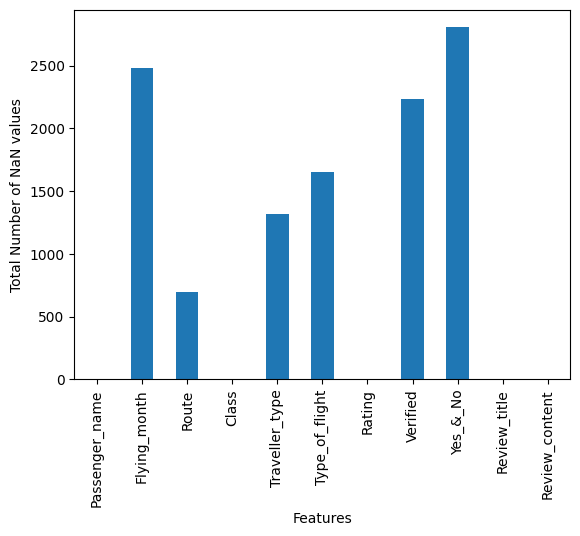

In [ ]:
df.isnull().sum().plot(kind= 'bar')
plt.xlabel('Features')
plt.ylabel("Total Number of NaN values")

In [ ]:
df.describe(include="all")

,Passenger_name,Flying_month,Route,Class,Traveller_type,Type_of_flight,Rating,Verified,Yes_&_No,Review_title,Review_content
count,3506,1023,2809,3504,2189,1855,3501.000000,1270,702,3506,3506
unique,2764,111,1542,4,3,193,NaN,2,2,2570,3506
top,David Ellis,Sep 2015,London to Johannesburg,Economy Class,Couple Leisure,A320,NaN,Trip Verified,Yes,British Airways customer review,The airline lost my luggage and was absolutely...
freq,43,26,16,1674,947,342,NaN,1067,401,880,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.764924,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,3.167312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN


In [ ]:
#Categorical Dataset Describe
df.describe(exclude=float)

,Passenger_name,Flying_month,Route,Class,Traveller_type,Type_of_flight,Verified,Yes_&_No,Review_title,Review_content
count,3506,1023,2809,3504,2189,1855,1270,702,3506,3506
unique,2764,111,1542,4,3,193,2,2,2570,3506
top,David Ellis,Sep 2015,London to Johannesburg,Economy Class,Couple Leisure,A320,Trip Verified,Yes,British Airways customer review,The airline lost my luggage and was absolutely...
freq,43,26,16,1674,947,342,1067,401,880,1


In [ ]:
df.rename(columns={'Yes_&_No': 'Recommended'}, inplace=True)
df['Recommended'].value_counts()

Yes    401
No     301
Name: Recommended, dtype: int64

In [ ]:
df.dtypes

Passenger_name     object
Flying_month       object
Route              object
Class              object
Traveller_type     object
Type_of_flight     object
Rating            float64
Verified           object
Recommended        object
Review_title       object
Review_content     object
dtype: object

# **2. Data Distribution**

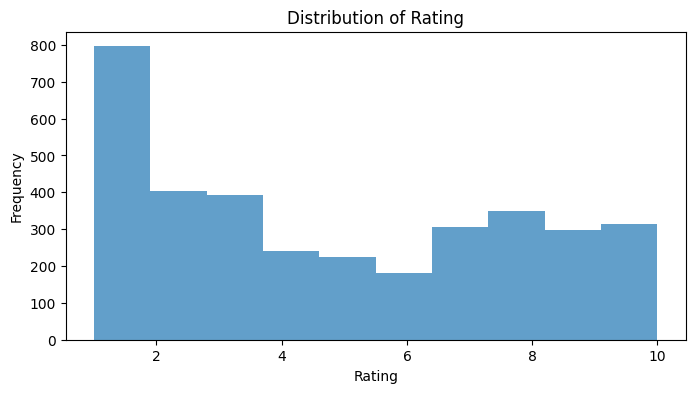

In [ ]:
# Plot histograms for each numerical column
for column in df.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=10, alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.show()

# **3. Outliers**

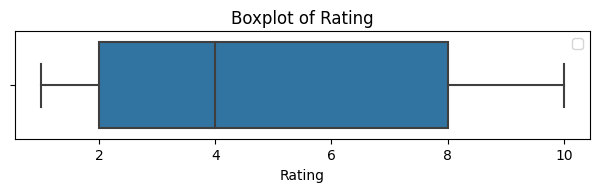

In [ ]:
from scipy import stats

def find_outliers_zscore(data):
    z_scores = stats.zscore(data)
    threshold = 3
    return (abs(z_scores) > threshold)

# Create a boxplot with outliers highlighted using Seaborn
plt.figure(figsize=(12, 8))

# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    if df[column].dtype in ['int64', 'float64']:  # Consider numerical columns only
        plt.subplot(len(df.columns)//2, 2, i+1)

# Find outliers using z-score method
        outliers = find_outliers_zscore(df[column])

# Create boxplot with outliers highlighted
        sns.boxplot(x=df[column])
        sns.scatterplot(x=df[column][outliers], y=df[column][outliers], color='red', label='Outliers')

        plt.title(f'Boxplot of {column}')
        plt.legend()

plt.tight_layout()
plt.show()

# **4. Correlation & Pattern**

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
        Rating
Rating     1.0


<ipython-input-338-9b1f26c4ec76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


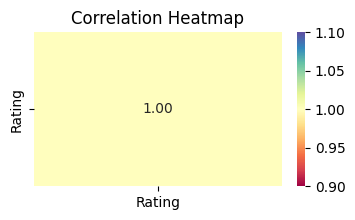

In [ ]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Visualization & Data Quality**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3579
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passenger_name  3506 non-null   object 
 1   Flying_month    1023 non-null   object 
 2   Route           2809 non-null   object 
 3   Class           3504 non-null   object 
 4   Traveller_type  2189 non-null   object 
 5   Type_of_flight  1855 non-null   object 
 6   Rating          3501 non-null   float64
 7   Verified        1270 non-null   object 
 8   Recommended     702 non-null    object 
 9   Review_title    3506 non-null   object 
 10  Review_content  3506 non-null   object 
dtypes: float64(1), object(10)
memory usage: 457.7+ KB


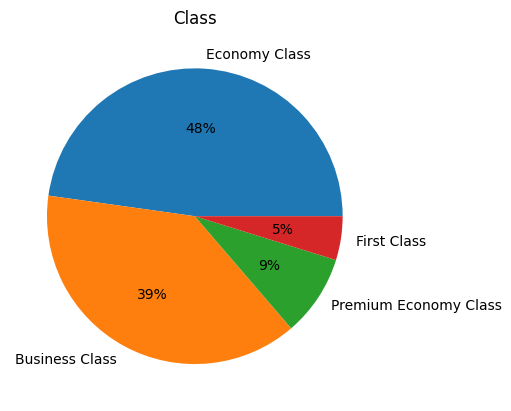

In [ ]:
df.Class.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Class')
plt.ylabel('')  # Remove the 'Class' label on the y-axis
plt.show()

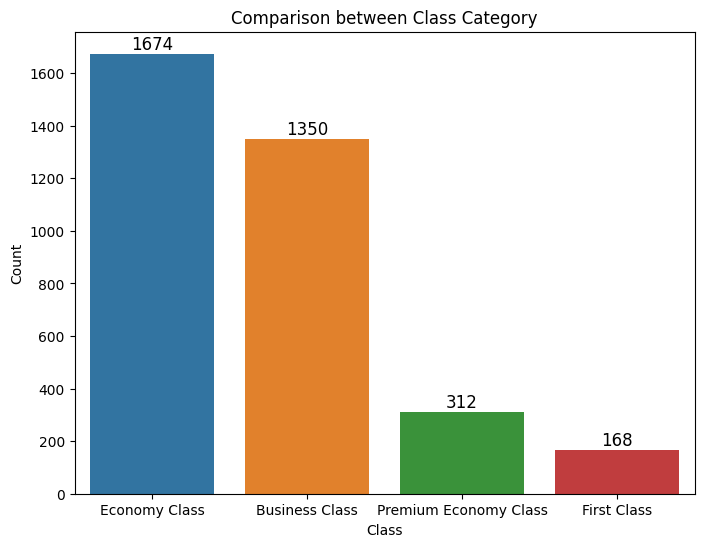

In [ ]:
# Total number of trip Class in the 'Class' column
plt.figure(figsize=(8, 6))

# Create a count plot for 'Class' column
ax = sns.countplot(data=df, x='Class')

# Calculate the total count for each category
total_counts = df['Class'].value_counts()

# Annotate the bars with the total count of people for each category
for i, count in enumerate(total_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Comparison between Class Category')

plt.show()

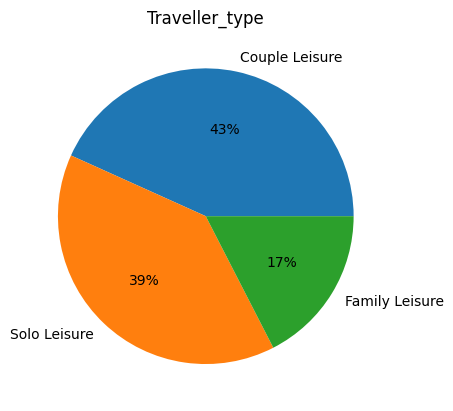

In [ ]:
df.Traveller_type.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Traveller_type')
plt.ylabel('')  # Remove the 'Traveller_type' label on the y-axis
plt.show()

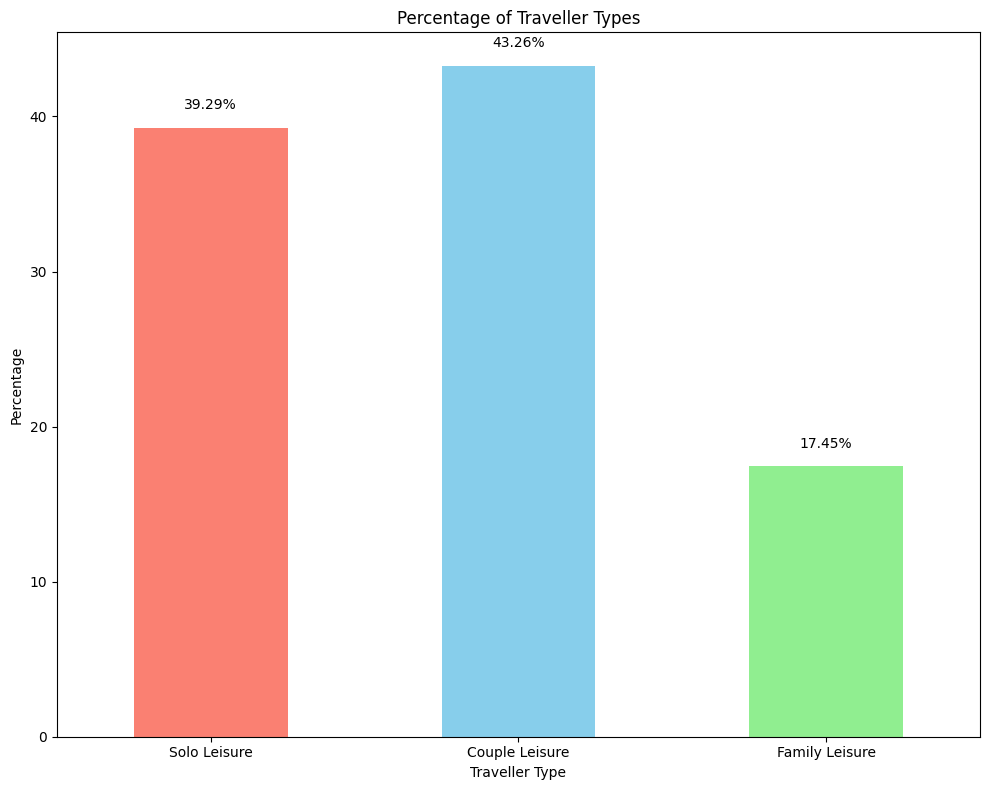

In [ ]:
# Reorder the traveller types
df['Traveller_type'] = pd.Categorical(df['Traveller_type'], categories=['Solo Leisure', 'Couple Leisure', 'Family Leisure'], ordered=True)

# Calculate the count of each traveller type
traveller_type_count = df['Traveller_type'].value_counts()

# Calculate percentages for each traveller type
percentage_values = (traveller_type_count / traveller_type_count.sum()) * 100

# Set colors for different traveller types
colors = {'Solo Leisure': 'skyblue', 'Couple Leisure': 'salmon', 'Family Leisure': 'lightgreen'}

# Plotting the bar plot for traveller type in percentage with specific colors
plt.figure(figsize=(10, 8))
barplot = percentage_values.sort_index().plot(kind='bar', color=[colors[type] for type in traveller_type_count.index])
plt.title('Percentage of Traveller Types')
plt.xlabel('Traveller Type')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Adding percentage values as annotations on top of each bar
for i, value in enumerate(percentage_values.sort_index()):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



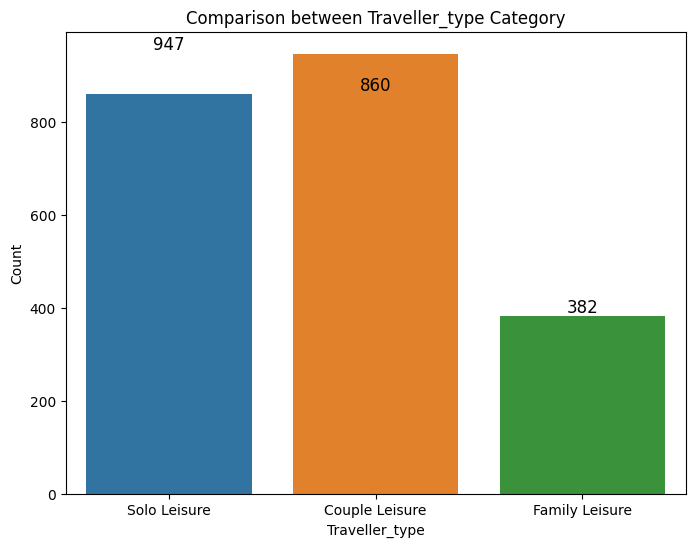

In [ ]:
# Total number of trip Traveller_type in the 'Traveller_type' column
plt.figure(figsize=(8, 6))

# Create a count plot for 'Traveller_type' column
ax = sns.countplot(data=df, x='Traveller_type')

# Calculate the total count for each category
total_counts = df['Traveller_type'].value_counts()

# Annotate the bars with the total count of people for each category
for i, count in enumerate(total_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Traveller_type')
plt.ylabel('Count')
plt.title('Comparison between Traveller_type Category')

plt.show()

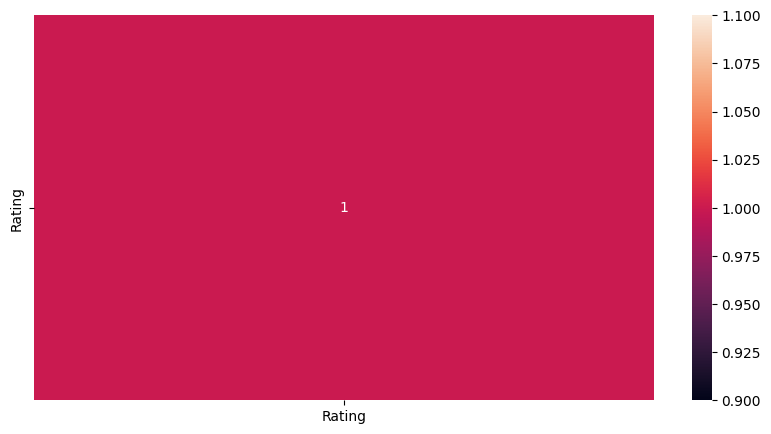

In [ ]:
#plotting a correlation heatmap for all variables
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.select_dtypes(include = np.number).corr(),annot=True)
plt.show()

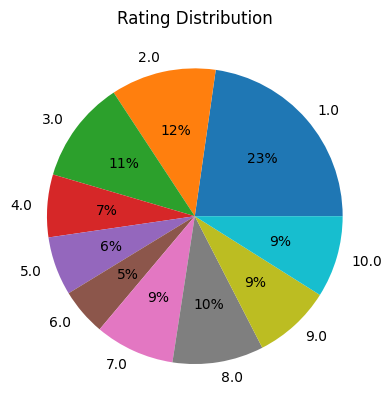

In [ ]:
# Plot pie chart for ratings in ascending order
df['Rating'].value_counts().sort_index().plot.pie(autopct='%1.0f%%')
plt.title('Rating Distribution')
plt.ylabel('')  # Remove the 'Rating' label on the y-axis
plt.show()

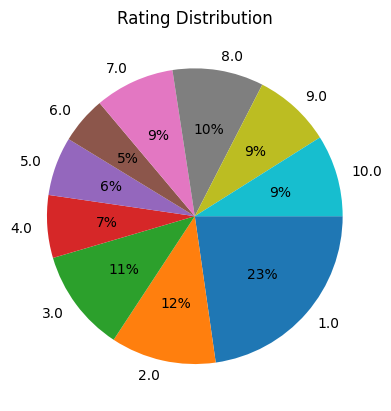

In [ ]:
# Plot pie chart for ratings in descending order (anticlockwise)
df['Rating'].value_counts().sort_index(ascending=True).plot.pie(autopct='%1.0f%%', counterclock=False)
plt.title('Rating Distribution')
plt.ylabel('')  # Remove the 'Rating' label on the y-axis
plt.show()

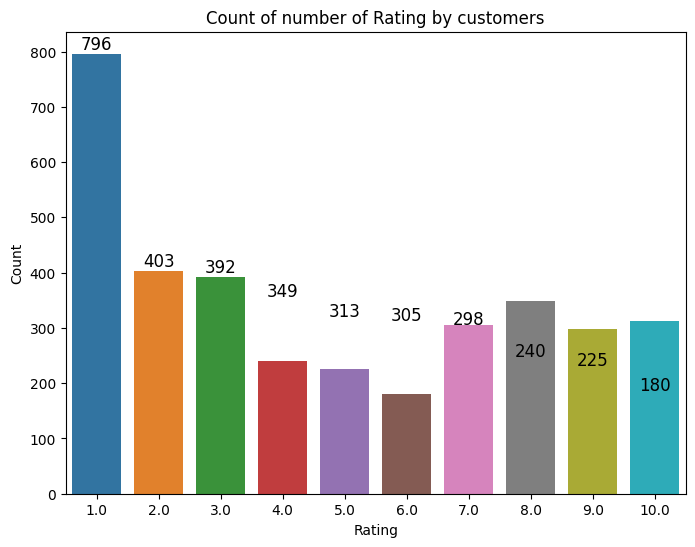

In [ ]:
# Total number of trip Rating in the 'Rating' column
plt.figure(figsize=(8, 6))

# Create a count plot for 'Rating' column
ax = sns.countplot(data=df, x='Rating')

# Calculate the total count for each category
total_counts = df['Rating'].value_counts()

# Annotate the bars with the total count of people for each category
for i, count in enumerate(total_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of number of Rating by customers')

plt.show()

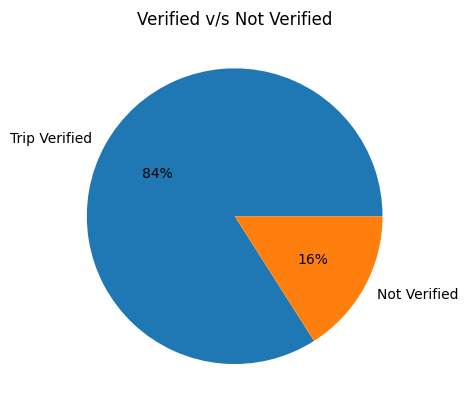

In [ ]:
df.Verified.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Verified v/s Not Verified')
plt.ylabel('')  # Remove the 'Verified' label on the y-axis
plt.show()

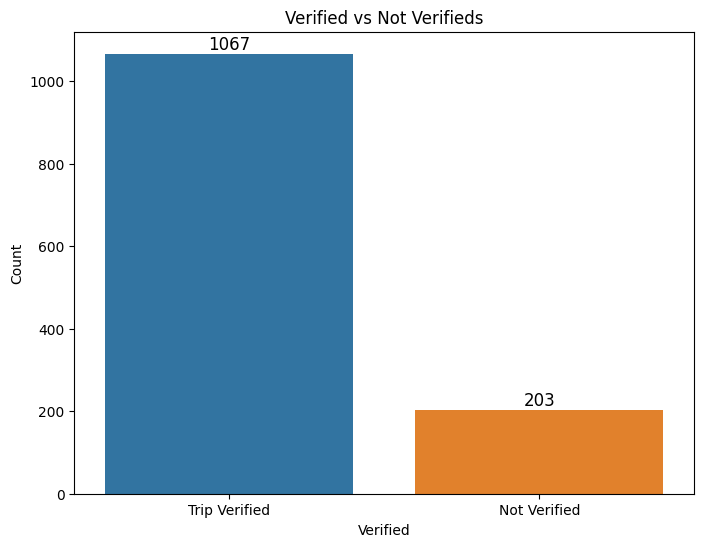

In [ ]:
# Total number of trip verified in the 'Verified' column
plt.figure(figsize=(8, 6))

# Create a count plot for 'Verified' column
ax = sns.countplot(data=df, x='Verified')

# Calculate the total count for each category
total_counts = df['Verified'].value_counts()

# Annotate the bars with the total count of people for each category
for i, count in enumerate(total_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Verified')
plt.ylabel('Count')
plt.title('Verified vs Not Verifieds')

plt.show()

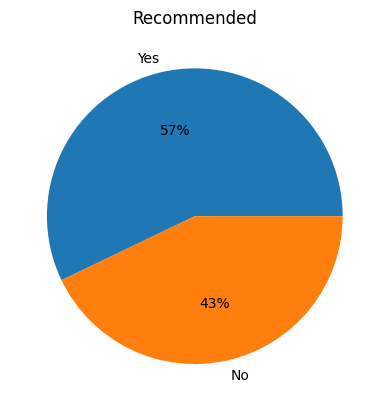

In [ ]:
df.Recommended.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Recommended')
plt.ylabel('')  # Remove the 'Recommended' label on the y-axis
plt.show()

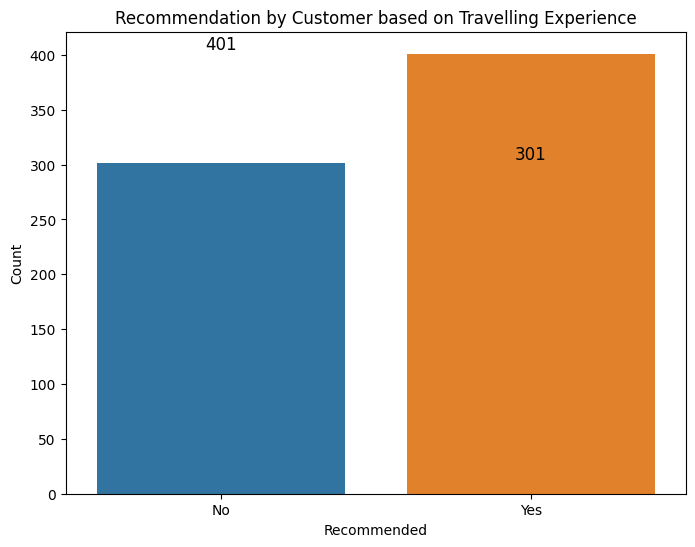

In [ ]:
# Total number of trip Recommended in the 'Recommended' column
plt.figure(figsize=(8, 6))

# Create a count plot for 'Recommended' column
ax = sns.countplot(data=df, x='Recommended')

# Calculate the total count for each category
total_counts = df['Recommended'].value_counts()

# Annotate the bars with the total count of people for each category
for i, count in enumerate(total_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.title('Recommendation by Customer based on Travelling Experience')

plt.show()

In [ ]:
Review_content_length = df.Review_content.str.len()

In [ ]:
type(Review_content_length)

pandas.core.series.Series

In [ ]:
# finding the reviews with max length
max(Review_content_length)

3534

In [ ]:
# finding the reviews with min length
min(Review_content_length)

83

In [ ]:
df

,Passenger_name,Flying_month,Route,Class,Traveller_type,Type_of_flight,Rating,Verified,Recommended,Review_title,Review_content
0,Paige Boet,Jun 2023,New Orleans to London,Economy Class,Solo Leisure,NaN,1.0,Trip Verified,NaN,The airline lost my luggage,The airline lost my luggage and was absolutely...
1,S Layne,Mar 2023,London to Amman,Business Class,Couple Leisure,NaN,1.0,Trip Verified,NaN,fully refunded by our travel insurance,"We booked on the BA website, round trip flight..."
2,E Lanewoski,NaN,Heathrow to Bodrum,Business Class,Solo Leisure,A321 neo,2.0,Trip Verified,NaN,no boarding drinks provided,"First time flying with BA business class, neve..."
3,Joel Burman,Jun 2023,Amman to London,Economy Class,Solo Leisure,NaN,4.0,Not Verified,NaN,WiFi didn't work,You can buy sandwiches and crisps but don't ex...
4,R Vines,NaN,London City to Ibiza,Business Class,Family Leisure,Embraer 190,7.0,Trip Verified,NaN,stick with economy,This is a two-for-one review covering economy ...
...,...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,Aug 2012,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...
3576,S Luqman,NaN,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,Just got back from Bridgetown Barbados flying ...
3577,D Smith,NaN,NaN,Economy Class,NaN,NaN,4.0,NaN,No,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3578,W Benson,Aug 2012,NaN,Business Class,NaN,NaN,6.0,NaN,Yes,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...


# **Import Libraries for BERT**

In [ ]:
!pip install transformers
!pip install torch


In [ ]:
!pip install --upgrade transformers accelerate


In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install transformers

In [ ]:

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, Dataset
import torch
from tqdm import tqdm



df = df.dropna(subset=['Rating'])

# Map ratings to sentiment labels (assuming 1-5 as negative, 6-7 as neutral, and 8-10 as positive)
df['Sentiment'] = pd.cut(df['Rating'], bins=[0, 5, 7, 10], labels=['negative', 'neutral', 'positive'])

# Split data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and pad sequences
max_length = 64

def tokenize_and_pad(sequence):
    tokens = tokenizer.encode(sequence, add_special_tokens=True)[:max_length]
    padded_tokens = tokens + [0] * (max_length - len(tokens))
    attention_mask = [1] * len(tokens) + [0] * (max_length - len(tokens))
    return torch.tensor(padded_tokens), torch.tensor(attention_mask)

train_df['input_ids'], train_df['attention_mask'] = zip(*train_df['Review_content'].apply(tokenize_and_pad))
test_df['input_ids'], test_df['attention_mask'] = zip(*test_df['Review_content'].apply(tokenize_and_pad))

# Drop rows with NaN values in the 'input_ids' or 'attention_mask' columns
train_df = train_df.dropna(subset=['input_ids', 'attention_mask'])
test_df = test_df.dropna(subset=['input_ids', 'attention_mask'])

# Define PyTorch Dataset
class SentimentDataset(Dataset):
    def __init__(self, dataframe):
        self.data = dataframe

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_ids = self.data.iloc[idx]['input_ids']
        attention_mask = self.data.iloc[idx]['attention_mask']
        label = torch.tensor({'negative': 0, 'neutral': 1, 'positive': 2}[self.data.iloc[idx]['Sentiment']])
        return input_ids, attention_mask, label

# Create DataLoader
def collate_fn(batch):
    inputs, masks, labels = zip(*batch)
    inputs = torch.stack(inputs)
    masks = torch.stack(masks)
    labels = torch.stack(labels)
    return inputs, masks, labels

train_dataset = SentimentDataset(train_df)
test_dataset = SentimentDataset(test_df)

batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

# Model and optimizer
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3,
    ignore_mismatched_sizes=True  # Ignore mismatched sizes during loading
)
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_dataloader) * 2)

# Training loop
num_epochs = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        inputs, masks, labels = batch
        inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks)[0]
        loss = torch.nn.functional.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

# Evaluation
model.eval()
all_preds, all_labels = [], []

for batch in tqdm(test_dataloader, desc='Evaluating'):
    inputs, masks, labels = batch
    inputs, masks, labels = inputs.to(device), masks.to(device), labels.to(device)
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)[0]
        preds = torch.argmax(outputs, dim=1).tolist()
        all_preds.extend(preds)
        all_labels.extend(labels.tolist())

# Evaluate accuracy or other metrics as needed
accuracy = (torch.tensor(all_preds) == torch.tensor(all_labels)).float().mean().item()
print(f'Accuracy: {accuracy}')


Token indices sequence length is longer than the specified maximum sequence length for this model (526 > 512). Running this sequence through the model will result in indexing errors
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Evaluating: 100%|██████████| 88/88 [02:27<00:00,  1.68s/it]

Accuracy: 0.7817403674125671


# **Creating new dataframe name df_Class for doing analysis based on Class column values those are available**

# **•	Research Question 1: Is there any impact of the class of travel on customer experience?**


1.   Let us first compare the class with ratings

In [ ]:
df_Class= df[df['Class'].notnull()].copy()

In [ ]:
df_Class.info()

In [ ]:
pip install scipy

In [ ]:
# Box plot to visualize the impact of class on ratings
plt.figure(figsize=(8, 6))
df_Class.boxplot(column='Rating', by='Class', grid=False)
plt.title('Impact of Class on Customer Ratings')
plt.xlabel('Class')
plt.ylabel('Ratings')
plt.show()


In [ ]:
import scipy
from scipy.stats import f_oneway
# Perform ANOVA test to compare ratings among different travel classes
grouped_data = [df_Class[df_Class['Class'] == cls]['Rating'] for cls in df_Class['Class'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)
print(f"ANOVA Test - F-statistic: {f_statistic}, p-value: {p_value}")

In [ ]:
from scipy.stats import kruskal

# Assuming df_Class contains 'Class' and 'Rating' columns
# Perform Kruskal-Wallis test for 'Rating' among different 'Class' groups
kruskal_statistic, p_value = kruskal(*[df_Class[df_Class['Class'] == cls]['Rating'] for cls in df_Class['Class'].unique()])
print(f"Kruskal-Wallis Test - H-statistic: {kruskal_statistic}, p-value: {p_value}")


In [ ]:
from scipy.stats import chi2_contingency
# This test determines if there's a significant association between 'Travel_Class' and 'Customer_Rating'. However, it's important to
# note that for comparing a categorical variable (like travel class) with a continuous variable (like customer ratings),
# a chi-square test isn't the appropriate method for measuring the strength or direction of their relationship.
# Adjust your analysis method based on the specific nature of your data and research question.

# Create a contingency table between 'Travel_Class' and 'Rating'
contingency_table = pd.crosstab(df_Class['Class'], df_Class['Rating'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test statistic: {chi2}, p-value: {p_value}")

In [ ]:
# Extract ratings for each class
ratings_economy = df_Class[df_Class['Class'] == 'Economy Class']['Rating']
ratings_premium_economy = df_Class[df_Class['Class'] == 'Premium Economy Class']['Rating']
ratings_business = df_Class[df_Class['Class'] == 'Business Class']['Rating']
ratings_first_class = df_Class[df_Class['Class'] == 'First Class']['Rating']

# Perform ANOVA test
f_statistic, p_value = f_oneway(ratings_economy, ratings_premium_economy, ratings_business, ratings_first_class)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average ratings among classes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average ratings among classes.")


In [ ]:
# Calculate average ratings for each class
avg_ratings = df_Class.groupby('Class')['Rating'].mean().sort_values()

# Bar graph to visualize average ratings per class
plt.figure(figsize=(8, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings per Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Calculate average ratings for each class
avg_ratings = df_Class.groupby('Class')['Rating'].mean().sort_values()

# Define colors for each bar
colors = ['skyblue', 'orange', 'silver', 'gold']  # Add more colors as needed for each class

# Bar graph to visualize average ratings per class with different colors
plt.figure(figsize=(8, 6))
avg_ratings.plot(kind='bar', color=colors)
plt.title('Average Ratings per Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)

# Add text labels for each bar
for index, value in enumerate(avg_ratings):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate average ratings for each class
avg_ratings = df_Class.groupby('Class')['Rating'].mean().sort_values()

# Bar graph to visualize average ratings per class
plt.figure(figsize=(8, 6))
avg_ratings.plot(kind='bar', color='turquoise')
plt.title('Average Ratings per Class')
plt.xlabel('Class')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)

# Add text labels for each bar
for index, value in enumerate(avg_ratings):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [ ]:
# Pivot the DataFrame to create a heatmap
heatmap_data = df_Class.pivot_table(index='Class', columns='Rating', aggfunc='size', fill_value=0)

# Heatmap to visualize the distribution of ratings across classes
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.title('Rating Distribution across Classes')
plt.xlabel('Rating')
plt.ylabel('Class')
plt.show()

In [ ]:
# Calculate percentage of total ratings for each class
rating_counts = df_Class['Class'].value_counts(normalize=True) * 100

# Pie chart to visualize percentage of total ratings contributed by each class
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Percentage of Total Ratings by Class')
plt.show()

In [ ]:
# Calculate percentage of total ratings for each class
rating_counts = df_Class['Class'].value_counts(normalize=True) * 100

# Define the order of classes
class_order = ['Economy Class', 'Premium Economy Class', 'Business Class', 'First Class']

# Reorder the rating_counts Series based on the defined order
rating_counts = rating_counts[class_order]

# Create a pie chart with the ordered data
plt.figure(figsize=(8, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Percentage of Total Ratings by Class')
plt.show()

2.   Second compare class with reviews with respect to sentimental analysis for which class has more positive, negative and neutral travel experience


In [ ]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Perform sentiment analysis for each class separately
sentiment_results = {}
for class_name in df_Class['Class'].unique():
    class_reviews = df_Class[df_Class['Class'] == class_name]['Review_content']

    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for review in class_reviews:
        sentiment_score = sia.polarity_scores(review)['compound']
        sentiment = classify_sentiment(sentiment_score)

        if sentiment == 'Positive':
            positive_count += 1
        elif sentiment == 'Negative':
            negative_count += 1
        else:
            neutral_count += 1

    sentiment_results[class_name] = {'Positive': positive_count, 'Negative': negative_count, 'Neutral': neutral_count}

# Display sentiment analysis results for each class
for class_name, sentiment_counts in sentiment_results.items():
    print(f"Sentiment Analysis for {class_name}:")
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment}: {count}")
    print()

In [ ]:
# Drop rows with NaN values in 'Class' column
df_Class.dropna(subset=['Class'], inplace=True)

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Perform sentiment analysis for each class separately
sentiment_results = {}
for class_name in df_Class['Class'].unique():
    class_reviews = df_Class[df_Class['Class'] == class_name]['Review_content']

    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for review in class_reviews:
        sentiment_score = sia.polarity_scores(review)['compound']
        sentiment = classify_sentiment(sentiment_score)

        if sentiment == 'Positive':
            positive_count += 1
        elif sentiment == 'Negative':
            negative_count += 1
        else:
            neutral_count += 1

    sentiment_results[class_name] = {'Positive': positive_count, 'Negative': negative_count, 'Neutral': neutral_count}

# Display sentiment analysis results for each class
for class_name, sentiment_counts in sentiment_results.items():
    print(f"Sentiment Analysis for {class_name}:")
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment}: {count}")
    print()


In [ ]:
# Convert sentiment analysis results to DataFrame
sentiment_df = pd.DataFrame(sentiment_results).T

# Plotting bar graphs for sentiment analysis results
sentiment_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Analysis for Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.show()


In [ ]:
# Plotting vertical bar graphs for sentiment analysis results
sentiment_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Sentiment Analysis for Each Class')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()

In [ ]:
# Plotting vertical bar graphs for sentiment analysis results with labels
ax = sentiment_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Sentiment Analysis for Each Class')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
# Calculate correlation matrix
correlation_matrix = sentiment_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix for Sentiment Analysis')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# Transpose the sentiment analysis DataFrame
sentiment_df_transposed = sentiment_df.T

# Create a correlation matrix between sentiment analysis and classes
correlation_matrix = sentiment_df_transposed.corr()

print("Correlation Matrix between Sentiment Analysis and Classes:")
print(correlation_matrix)

In [ ]:
correlation_matrix

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".3f")
plt.title('Correlation Matrix between Sentiment Analysis and Classes')
plt.xlabel('Class')
plt.ylabel('Class')
plt.show()

In [ ]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment based on score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Perform sentiment analysis for each class separately
sentiment_results = {}
for class_name in df_Class['Class'].unique():
    class_reviews = df_Class[df_Class['Class'] == class_name]['Review_content']

    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for review in class_reviews:
        sentiment_score = sia.polarity_scores(review)['compound']
        sentiment = classify_sentiment(sentiment_score)

        if sentiment == 'Positive':
            positive_count += 1
        elif sentiment == 'Negative':
            negative_count += 1
        else:
            neutral_count += 1

    total_reviews = positive_count + negative_count + neutral_count
    sentiment_results[class_name] = {
        'Positive': (positive_count / total_reviews) * 100,
        'Negative': (negative_count / total_reviews) * 100,
        'Neutral': (neutral_count / total_reviews) * 100
    }

# Convert sentiment analysis results to DataFrame
sentiment_df_Class = pd.DataFrame(sentiment_results).T.reset_index().rename(columns={'index': 'Class'})

# Melt the DataFrame for visualization
melted_sentiment_df_Class = sentiment_df_Class.melt(id_vars='Class', var_name='Sentiment', value_name='Percentage')

# Plotting the grouped bar plot for percentage distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Percentage', hue='Sentiment', data=melted_sentiment_df_Class, palette='coolwarm')
plt.title('Percentage Distribution of Sentiment Analysis for Each Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
sentiment_df_Class

In [ ]:
# Plotting the heatmap of percentage distribution
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_df_Class.set_index('Class'), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Percentage Distribution of Sentiment Analysis for Each Class')
plt.xlabel('Sentiment')
plt.ylabel('Class')
plt.show()


In [ ]:
# Plotting pie charts for each class
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, class_name in enumerate(sentiment_df_Class['Class']):
    data = sentiment_df_Class.iloc[i, 1:].values
    labels = sentiment_df_Class.columns[1:]

    axs[i].pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['seagreen','red','turquoise'])
    axs[i].set_title(f'Sentiment Distribution for {class_name}')

plt.tight_layout()
plt.show()


In [ ]:
df_Class.info()

# **Creating new dataframe name df_Flying_month for doing analysis based on flying month column values are available**

In [ ]:
df_Flying_month= df[df['Flying_month'].notnull()].copy()

In [ ]:
df_Flying_month.info()

# **•	Research Question 2: Does month of travel affect customer’s ratings?**

In [ ]:
from scipy.stats import f_oneway

# Box plot of ratings by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Flying_month', y='Rating', data=df_Flying_month)
plt.title('Distribution of Ratings by Month of Travel')
plt.xlabel('Month of Travel')
plt.ylabel('Customer Rating')
plt.show()

# ANOVA test
grouped_data = [df_Flying_month[df_Flying_month['Flying_month'] == month]['Rating'] for month in df_Flying_month['Flying_month'].unique()]
f_stat, p_value = f_oneway(*grouped_data)
print(f'ANOVA Test - F-statistic: {f_stat}, p-value: {p_value}')

In [ ]:
# Plot average Ratings per Flying_month
Flying_monthly_avg_Ratings = df_Flying_month.groupby('Flying_month')['Rating'].mean()

plt.figure(figsize=(18, 6))
Flying_monthly_avg_Ratings.plot(kind='line', marker='o')
plt.title('Average Ratings Over Time')
plt.xlabel('Flying_month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
# Convert 'Flying_month' to datetime format
df_Flying_month['Flying_month'] = pd.to_datetime(df_Flying_month['Flying_month'], format='%b %Y')

# Extract month as numerical value
df_Flying_month['Numeric_month'] = df_Flying_month['Flying_month'].dt.month

# Calculate correlation between 'Numeric_month' and 'Rating'
correlation_coefficient = df_Flying_month['Numeric_month'].corr(df_Flying_month['Rating'])
print(f"Correlation coefficient between 'Flying_month' and 'Rating': {correlation_coefficient}")


In [ ]:
# Perform ANOVA to test if there are significant Rating differences among months
grouped_data = [df_Flying_month[df_Flying_month['Flying_month'].dt.month == m]['Rating'] for m in range(1, 13)]
f_statistic, p_value = f_oneway(*grouped_data)
print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value}")


In [ ]:
# Perform ANOVA test for comparing 'Rating' among different months
# Example: Categorizing 'Flying_month' into months (1-12)
month_categories = [df_Flying_month[df_Flying_month['Flying_month'].dt.month == i]['Rating'] for i in range(1, 13)]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*month_categories)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average Rating among different months.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average Rating among different months.")

In [ ]:
# Drop rows with missing values in 'Flying_month' and 'Rating' columns
df_Flying_month.dropna(subset=['Flying_month', 'Rating'], inplace=True)

# Convert 'Flying_month' to month (numeric representation)
df_Flying_month['month_numeric'] = pd.to_datetime(df_Flying_month['Flying_month']).dt.month

# Calculate correlation between 'month_numeric' and 'Rating'
correlation = df_Flying_month['month_numeric'].corr(df_Flying_month['Rating'])
print(f"Correlation between 'Flying_month' and 'Rating': {correlation}")

# Create a heatmap
data = df_Flying_month[['month_numeric', 'Rating']]
heatmap_data = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap: Flying_month vs Rating')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
# Drop rows with missing values in 'Flying_month' and 'Rating' columns
df_Flying_month.dropna(subset=['Flying_month', 'Rating'], inplace=True)

# Convert 'Flying_month' to month (numeric representation)
df_Flying_month['month_numeric'] = pd.to_datetime(df_Flying_month['Flying_month']).dt.month

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_Flying_month['month_numeric'], df_Flying_month['Rating'], alpha=0.5)
plt.title('Scatter Plot: Flying_month vs Rating')
plt.xlabel('Month (numeric)')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Drop rows with missing values in 'Rating' columns
df_Flying_month.dropna(subset=['Rating'], inplace=True)

# Convert 'Flying_month' to month (numeric representation)
df_Flying_month['month_numeric'] = pd.to_datetime(df_Flying_month['Flying_month']).dt.month

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='month_numeric', y='Rating', data=df_Flying_month)
plt.title('Box Plot: Flying_month vs Rating')
plt.xlabel('Month (numeric)')
plt.ylabel('Rating')
plt.show()

In [ ]:
# Drop rows with missing values in 'Flying_month' and 'Rating' columns
df_Flying_month.dropna(subset=['Flying_month', 'Rating'], inplace=True)

# Convert 'Flying_month' to month (numeric representation)
df_Flying_month['month_numeric'] = pd.to_datetime(df_Flying_month['Flying_month']).dt.month

# Calculate correlation between 'month_numeric' and 'Rating'
correlation = df_Flying_month['month_numeric'].corr(df_Flying_month['Rating'])
print(f"Correlation between 'Flying_month' and 'Rating': {correlation}")

# Create a heatmap
data = df_Flying_month[['month_numeric', 'Rating']]
heatmap_data = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap: Flying_month vs Rating')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [ ]:
# Drop rows with missing values in 'Flying_month' and 'Rating' columns
df_Flying_month.dropna(subset=['Flying_month', 'Rating'], inplace=True)

# Convert 'Flying_month' to month (numeric representation)
df_Flying_month['month_numeric'] = pd.to_datetime(df_Flying_month['Flying_month']).dt.month

# Create a pivot table to show the relationship between 'Rating' and 'month_numeric'
pivot_table = df_Flying_month.pivot_table(index='Rating', columns='month_numeric', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Paired')
plt.title('Relationship between Rating and Flying Month')
plt.xlabel('Month (Numeric)')
plt.ylabel('Rating')
plt.show()

In [ ]:
df_Flying_month.info()

# **Creating new dataframe name df_Traveller_type for doing analysis based on Traveller_type column values those are available**

In [ ]:
df_Traveller_type= df[df['Traveller_type'].notnull()].copy()

In [ ]:
df_Traveller_type.info()

# **•	Research Question 3: Has traveller type influence on customer’s review?**

In [ ]:
# Bar plot to visualize reviews by traveller type
plt.figure(figsize=(8, 6))
sns.countplot(x='Traveller_type', data=df_Traveller_type)
plt.title('Reviews by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count of Reviews')
plt.show()


In [ ]:
# Define the desired order for traveller types
desired_order = ['Solo Leisure', 'Couple Leisure', 'Family Leisure']

# Calculate count of reviews for each traveller type
count_reviews = df_Traveller_type['Traveller_type'].value_counts()

# Calculate percentage of reviews for each traveller type
percentage_reviews = df_Traveller_type['Traveller_type'].value_counts(normalize=True) * 100

# Create a figure with two subplots (side-by-side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Count of reviews by traveller type in the desired order
sns.countplot(x='Traveller_type', data=df_Traveller_type, order=desired_order, ax=axes[0])
axes[0].set_title('Reviews by Traveller Type (Count)')
axes[0].set_xlabel('Traveller Type')
axes[0].set_ylabel('Count of Reviews')

# Display count values on top of bars
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

# Plot 2: Percentage of reviews by traveller type in the desired order
percentage_reviews[desired_order].plot(kind='bar', ax=axes[1])
axes[1].set_title('Reviews by Traveller Type (%)')
axes[1].set_xlabel('Traveller Type')
axes[1].set_ylabel('% of Reviews')

# Display percentage values on top of bars
for i, v in enumerate(percentage_reviews[desired_order]):
    axes[1].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Set x-axis tick labels rotation to horizontal
plt.xticks(range(len(desired_order)), desired_order, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
# Define the desired order for traveller types and corresponding colors
desired_order = ['Solo Leisure', 'Couple Leisure', 'Family Leisure']
colors = ['skyblue', 'salmon', 'lightgreen']

# Calculate count of reviews for each traveller type
count_reviews = df_Traveller_type['Traveller_type'].value_counts()

# Calculate percentage of reviews for each traveller type
percentage_reviews = df_Traveller_type['Traveller_type'].value_counts(normalize=True) * 100

# Create a figure with two subplots (side-by-side)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot 1: Count of reviews by traveller type in the desired order with custom colors
sns.countplot(x='Traveller_type', data=df_Traveller_type, order=desired_order, ax=axes[0], palette=colors)
axes[0].set_title('Reviews by Traveller Type (Count)')
axes[0].set_xlabel('Traveller Type')
axes[0].set_ylabel('Count of Reviews')

# Display count values on top of bars
for i, p in enumerate(axes[0].patches):
    axes[0].annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom', color='black')

# Plot 2: Percentage of reviews by traveller type in the desired order with custom colors
percentage_reviews[desired_order].plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Reviews by Traveller Type (Percentage)')
axes[1].set_xlabel('Traveller Type')
axes[1].set_ylabel('Percentage of Reviews')

# Display percentage values on top of bars
for i, v in enumerate(percentage_reviews[desired_order]):
    axes[1].text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

# Set x-axis tick labels rotation to horizontal
plt.xticks(range(len(desired_order)), desired_order, rotation=0)

plt.tight_layout()
plt.show()


In [ ]:
percentage_reviews

In [ ]:
count_reviews

In [ ]:
# Creating a new variable or column  named 'Sentiment' and using the NLTK package applying the sentiment analysis to observe each row of Review_content whether
# the given reviews is positive, negative, or neutral.
# Initialize SentimentIntensityAnalyzer from NLTK
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each row based on Traveller_type
def analyze_sentiment(row):
    sentiment_score = sia.polarity_scores(row['Review_content'])
    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis function to the dataframe
df_Traveller_type['Sentiment'] =df_Traveller_type.apply(analyze_sentiment, axis=1)

# Display a sample of the dataframe with the sentiment column
print(df_Traveller_type[['Traveller_type', 'Review_content', 'Sentiment']].head(10))

In [ ]:
df_Traveller_type['Sentiment'].value_counts()

In [ ]:
df_Traveller_type.info()

In [ ]:
# Create a grouped bar plot for sentiment analysis by traveller type
plt.figure(figsize=(8, 6))
sns.countplot(x='Traveller_type', hue='Sentiment', data=df_Traveller_type, palette='viridis')
plt.title('Sentiment Analysis by Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Count of Reviews')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# Countplot for sentiment analysis by traveller type
plt.figure(figsize=(12, 6))

# Countplot showing count values
plt.subplot(1, 2, 1)
sns.countplot(x='Traveller_type', hue='Sentiment', data=df_Traveller_type, palette='viridis')
plt.title('Sentiment Analysis by Traveller Type (Count)')
plt.xlabel('Traveller Type')
plt.ylabel('Count of Reviews')
plt.legend(title='Sentiment')

# Count values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'\n{int(p.get_height())}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Define the desired order for traveller types and corresponding colors
desired_order = ['Solo Leisure', 'Couple Leisure', 'Family Leisure']
colors = ['green','red', 'gray']

# Calculate percentage of sentiments for each traveller type
percentage_sentiments = df_Traveller_type.groupby('Traveller_type')['Sentiment'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()

# Create countplot displaying percentage values with specific order and colors
plt.figure(figsize=(12, 6))

sns.barplot(x='Traveller_type', y='Percentage', hue='Sentiment', data=percentage_sentiments, palette=colors, order=desired_order)
plt.title('Sentiment Analysis by Traveller Type (%)')
plt.xlabel('Traveller Type')
plt.ylabel('% of Reviews')
plt.legend(title='Sentiment', loc='upper right')

# Display percentage values on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', color='black', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
percentage_sentiments


In [ ]:
# Create a contingency table between 'Traveller_type' and 'Sentiment'
contingency_table = pd.crosstab(df_Traveller_type['Traveller_type'], df_Traveller_type['Sentiment'])

# Perform Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")


In [ ]:
# Create a contingency table between 'Traveller_type' and 'Sentiments'
contingency_table = pd.crosstab(df_Traveller_type['Traveller_type'], df_Traveller_type['Sentiment'])

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant association between Traveller_type and Sentiments.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Traveller_type and Sentiments.")


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Create a contingency table between 'Traveller_type' and 'Sentiment'
contingency_table = pd.crosstab(df_Traveller_type['Traveller_type'], df_Traveller_type['Sentiment'])

# Normalize the contingency table for better comparison
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Create a custom colormap with red and green colors
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # Red, White, Green
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

# Create a heatmap for the normalized contingency table with the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_table, annot=True, cmap=cmap, fmt='.2f')
plt.title('Relation between Traveller Type and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Traveller Type')
plt.show()


In [ ]:
# Create a contingency table between 'Traveller_type' and 'Sentiment'
contingency_table = pd.crosstab(df_Traveller_type['Traveller_type'], df_Traveller_type['Sentiment'])

# Normalize the contingency table for better comparison
normalized_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Create a heatmap for the normalized contingency table
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_table, annot=True, cmap='icefire', fmt='.2f')
plt.title('Relation between Traveller Type and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Traveller Type')
plt.show()


In [ ]:
# Create a contingency table between 'Traveller_type' and 'Sentiment'
contingency_table = pd.crosstab(df_Traveller_type['Traveller_type'], df_Traveller_type['Sentiment'])

# Plotting a heatmap for the contingency table (raw counts)
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='flare', fmt='d')
plt.title('Contingency Table: Traveller Type vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Traveller Type')
plt.show()


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# Create a contingency table between 'Traveller_type' and 'Sentiment'
contingency_table = pd.crosstab(df_Traveller_type['Traveller_type'], df_Traveller_type['Sentiment'])

# Create a custom colormap
colors = [(1, 0, 0), (1, 1, 1), (0, 1, 0)]  # Red, White, Green
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)

# Plotting a heatmap for the contingency table with reversed colors
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap=cmap, fmt='d')
plt.title('Contingency Table: Traveller Type vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Traveller Type')
plt.show()

In [ ]:
df_Traveller_type.info()

# **Creating new dataframe name df_fmtt for doing analysis based on Traveller_type & Flying_month column values those are available**

In [ ]:
# Create a copy of the DataFrame df_fmtt without null values in 'Flying_month' or 'Traveller_type'
df_fmtt = df.dropna(subset=['Flying_month', 'Traveller_type']).copy()

In [ ]:
df_fmtt.info()

# **• Research Question 4: Is there a relationship between flying month and traveller type?**

In [ ]:
df_fmtt.to_csv(r'new31.csv')

In [ ]:
# Convert 'Flying_month' column to datetime format if it's not already in datetime
df_fmtt['Flying_month'] = pd.to_datetime(df_fmtt['Flying_month'])

# Convert 'Flying_month' to the desired format 'Month YYYY' (e.g., 'June 2023')
df_fmtt['Formatted_month'] = df_fmtt['Flying_month'].dt.strftime('%B %Y')

# Display the DataFrame with the updated 'Formatted_month' column
print(df_fmtt[['Flying_month', 'Formatted_month']])

In [ ]:
# Drop the original 'Flying_month' column
df_fmtt.drop(columns='Flying_month', inplace=True)

# Rename 'Formatted_month' column to 'Flying_month'
df_fmtt.rename(columns={'Formatted_month': 'Flying_month'}, inplace=True)

In [ ]:
df_fmtt

In [ ]:
df_fmtt['Flying_month'] = pd.to_datetime(df_fmtt['Flying_month'])

# Now, extract year and month from the 'Flying_month' column
df_fmtt['year'] = df_fmtt['Flying_month'].dt.year
df_fmtt['month'] = df_fmtt['Flying_month'].dt.month

In [ ]:
df_fmtt.info()

In [ ]:
df_fmtt

In [ ]:
# Create a contingency table between 'Flying_month_categories' and 'Traveller_type'
contingency_table = pd.crosstab(df_fmtt['Flying_month'], df_fmtt['Traveller_type'])

# Perform the Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print(f"Chi-square test statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df_fmtt['Flying_month'], df_fmtt['Traveller_type'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant relationship between Flying_month and Traveller_type.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between Flying_month and Traveller_type.")


In [ ]:
# Create a contingency table using crosstab
contingency_table = pd.crosstab(df_fmtt['year'], df_fmtt['Traveller_type'])

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Contingency Table: Flying year vs Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Flying year')

plt.tight_layout()
plt.show()

In [ ]:

# Grouping by month and traveler type and counting occurrences
monthly_traveller_counts = df_fmtt.groupby(['month', 'Traveller_type']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_traveller_counts, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Contingency Table: Flying Month vs Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Flying Month')

plt.tight_layout()
plt.show()

In [ ]:
df_fmtt

In [ ]:
# Convert 'Flying_month' to categories (e.g., months)
df_fmtt['Flying_month_categories'] = df_fmtt['Flying_month'].dt.strftime('%B')  # Month names from datetime

# Plotting a categorical scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Flying_month_categories', y='Traveller_type', data=df_fmtt, jitter=True)
plt.title('Traveller Type Distribution Across Months')
plt.xlabel('Flying Month')
plt.ylabel('Traveller Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plotting a categorical scatter plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='year', y='Traveller_type', data=df_fmtt, jitter=True)
plt.title('Traveller Type Distribution Across Years')
plt.xlabel('Flying Year')
plt.ylabel('Traveller Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Boxplots can show the distribution of data across different years for each traveler type, displaying quartiles, outliers, and
# median values.
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='Traveller_type', data=df_fmtt)
plt.title('Traveller Type Distribution Across Months')
plt.xlabel('Flying Month')
plt.ylabel('Traveller Type')
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Traveller_type', data=df_fmtt)
plt.title('Traveller Type Distribution Across Years')
plt.xlabel('Flying Year')
plt.ylabel('Traveller Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Violin plots combine the aspects of boxplot and kernel density estimation, providing insights into the distribution and
#probability density
plt.figure(figsize=(10, 6))
sns.violinplot(x='month', y='Traveller_type', data=df_fmtt)
plt.title('Traveller Type Distribution Across Months')
plt.xlabel('Flying Month')
plt.ylabel('Traveller Type')
plt.xticks(rotation=0)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='year', y='Traveller_type', data=df_fmtt)
plt.title('Traveller Type Distribution Across Years')
plt.xlabel('Flying Year')
plt.ylabel('Traveller Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Plotting a countplot to show the distribution of 'Traveller_type' across months
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='Flying_month_categories', hue='Traveller_type', data=df_fmtt)
plt.title('Traveller Type Distribution Across Months')
plt.xlabel('Flying Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Traveller Type')

# Annotate each bar with values and month names
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

# Set custom labels for x-axis (month names)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(0, len(months)), labels=months)

plt.tight_layout()
plt.show()


In [ ]:
# Plotting a countplot to show the distribution of 'Traveller_type' across years
plt.figure(figsize=(18, 8))
ax = sns.countplot(x='year', hue='Traveller_type', data=df_fmtt)
plt.title('Traveller Type Distribution Across Years')
plt.xlabel('Flying Year')
plt.ylabel('Count')
plt.legend(title='Traveller Type')

# Annotate each bar with values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame for percentage distribution of 'Traveller_type' across months
df_fmtt_month_percentage = df_fmtt.groupby(['month', 'Traveller_type']).size() / df_fmtt.groupby('month').size()
df_fmtt_month_percentage = df_fmtt_month_percentage.reset_index(name='Percentage')

# Plotting the percentage distribution of 'Traveller_type' across months
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Percentage', hue='Traveller_type', data=df_fmtt_month_percentage, palette='viridis')
plt.title('Percentage Distribution of Traveller Type Across Months')
plt.xlabel('Flying Month')
plt.ylabel('Percentage')
plt.legend(title='Traveller Type')

# Formatting x-axis labels to display month names (assuming the month is in numeric format)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months)

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='month', y='Percentage', hue='Traveller_type', data=df_fmtt_month_percentage, palette='viridis')

plt.title('Percentage Distribution of Traveller Type Across Months')
plt.xlabel('Flying Month')
plt.ylabel('Percentage')
plt.legend(title='Traveller Type')

# Add labels displaying the percentage values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     xytext=(0, 5),
                     textcoords='offset points',
                     fontsize=8)

# Formatting x-axis labels to display month names (assuming the month is in numeric format)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=months)

plt.tight_layout()
plt.show()



In [ ]:

# Create a DataFrame for percentage distribution of 'Traveller_type' across years
df_fmtt_year_percentage = df_fmtt.groupby(['year', 'Traveller_type']).size() / df_fmtt.groupby('year').size()
df_fmtt_year_percentage = df_fmtt_year_percentage.reset_index(name='Percentage')

# Plotting the percentage distribution of 'Traveller_type' across years with labels
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='year', y='Percentage', hue='Traveller_type', data=df_fmtt_year_percentage, palette='viridis')
plt.title('Percentage Distribution of Traveller Type Across Years')
plt.xlabel('Flying Year')
plt.ylabel('Percentage')
plt.legend(title='Traveller Type')

# Add labels displaying the percentage values on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points',
                     fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Create a pivot table to count occurrences of combinations of 'Flying_month' and 'Traveller_type'
pivot_table = df_fmtt.pivot_table(index='month', columns='Traveller_type', aggfunc='size')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Traveller Types per Flying Month')
plt.xlabel('Traveller Type')
plt.ylabel('Flying Month')

plt.tight_layout()
plt.show()

In [ ]:
# Create a pivot table to count occurrences of combinations of 'year' and 'Traveller_type'
pivot_table = df_fmtt.pivot_table(index='year', columns='Traveller_type', aggfunc='size')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Frequency of Traveller Types per Flying year')
plt.xlabel('Traveller Type')
plt.ylabel('Flying year')

plt.tight_layout()
plt.show()

In [ ]:
# Create a pivot table to count occurrences of combinations of 'Flying_month' and 'Traveller_type'
pivot_table = df_fmtt.pivot_table(index='month', columns='Traveller_type', aggfunc='size')

# Calculate the percentage distribution across 'Traveller_type' for each 'month'
percentage_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_table, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Percentage Distribution of Traveller Types per Flying Month')
plt.xlabel('Traveller Type')
plt.ylabel('Flying Month')

plt.tight_layout()
plt.show()

In [ ]:
# Create a pivot table to count occurrences of combinations of year' and 'Traveller_type'
pivot_table = df_fmtt.pivot_table(index='year', columns='Traveller_type', aggfunc='size')

# Calculate the percentage distribution across 'Traveller_type' for each 'month'
percentage_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(percentage_table, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Percentage Distribution of Traveller Types per Flying Month')
plt.xlabel('Traveller Type')
plt.ylabel('year')

plt.tight_layout()
plt.show()

# **Creating new dataframe name df5 for doing analysis based on Traveller_type & Class column values those are available**

In [ ]:
# Create a copy of the DataFrame df_fmtt without null values in 'Flying_month' or 'Traveller_type'
df5 = df.dropna(subset=['Class', 'Traveller_type']).copy()

In [ ]:
df5.info()

# **Research question 5: How does the booking frequency differ across various classes (e.g., economy, business, first class) for different traveler types (e.g., Solo, Couple, & family leisure )?**

In [ ]:
# Setting the order of 'Class' and 'Traveller_type' columns
class_order = ['Economy Class', 'Premium Economy Class', 'Business Class', 'First Class']
traveller_type_order = ['Solo Leisure', 'Couple Leisure', 'Family Leisure']

df5['Class'] = pd.Categorical(df5['Class'], categories=class_order, ordered=True)
df5['Traveller_type'] = pd.Categorical(df5['Traveller_type'], categories=traveller_type_order, ordered=True)

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df5['Class'], df5['Traveller_type'])

# Perform chi-squared test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Print chi-squared test result
print("Chi-squared statistic:", chi2)
print("p-value:", p_val)
print("Degree of Freedom:", dof)

# Interpretation of results
alpha = 0.05  # Set your chosen significance level here
if p_val < alpha:
    print('Reject null hypothesis: There is a significant relationship between Class and Traveller_type.')
else:
    print('Fail to reject null hypothesis: There is no significant relationship between Class and Traveller_type.')


In [ ]:
g_stat, p_value, dof, expected = chi2_contingency(contingency_table, lambda_="log-likelihood")
print("G-test statistic:", g_stat)
print("p-value:", p_value)
print("Degree of Freedom:", dof)


In [ ]:
# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table: Class vs. Traveller Type')
plt.xlabel('Traveler Type')
plt.ylabel('Class')
plt.show()

In [ ]:
# Set 'Class' and 'Traveller_type' columns as categorical with the specified order
df5['Class'] = pd.Categorical(df5['Class'], categories=class_order, ordered=True)
df5['Traveller_type'] = pd.Categorical(df5['Traveller_type'], categories=traveller_type_order, ordered=True)

# Create a contingency table
contingency_table = pd.crosstab(df5['Class'], df5['Traveller_type'], normalize='index') * 100  # Normalize to get percentages

# Plotting the heatmap with percentages
plt.figure(figsize=(8, 6))
ax = sns.heatmap(contingency_table, annot=True, cmap="icefire", fmt='.2f')  # Format as percentages

plt.title('Contingency Table(%): Class vs. Traveller Type')
plt.xlabel('Traveller Type')
plt.ylabel('Class')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df5, x='Class', hue='Traveller_type')

# Adding values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Counts of Classes by Traveler Types')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Traveler Type')
plt.show()


In [ ]:
# Creating countplot for Class by Traveller_type
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df5, x='Class', hue='Traveller_type')

# Calculate percentages and add annotations to bars
total = df5['Class'].count()  # Total count of entries
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total * 100:.1f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Percentage of Classes by Traveller Types')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.legend(title='Traveller Type')
plt.show()

# **Identify the factors affecting customer choices.**

In [ ]:
# Creating a copy of the DataFrame 'df'
df6 = df.copy()

In [ ]:
df6.info()

In [ ]:
df.to_csv(r'new32.csv')

# I can see whether the class has any connections with review content it has which type of feedback by doing sentiment analysis and then we can see how the rating is given by the customer.

In [ ]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Performing sentiment analysis
df6['Sentiment_Score'] = df6['Review_content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Define a threshold to categorize sentiment
threshold = 0.1

# Map sentiment scores to sentiment labels
df6['Sentiment'] = df6['Sentiment_Score'].apply(lambda score: 'positive' if score >= threshold else ('negative' if score <= -threshold else 'neutral'))


In [ ]:
df6.info()

# There are many factors that could affect the customer choices such as:
1. Rating
2. reviews by doing sentiment analysis
3. Type of flight
4. Route
5. Class
6. Recommendation

In [ ]:
df6

In [ ]:
df6['Sentiment'].value_counts()

In [ ]:
# Check the distribution of Sentiment across different classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Sentiment', data=df6)
plt.title('Sentiment Distribution across Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Evaluate the influence of holiday booking time on customer behaviour.

In [ ]:
# Creating a copy of the DataFrame 'df'
df7 = df.copy()

# Drop rows with null values in the 'Flying_month' column
df7.dropna(subset=['Flying_month'], inplace=True)

In [ ]:
# Convert 'Flying_month' column to datetime format
df7['Flying_month'] = pd.to_datetime(df7['Flying_month'], format='%b %Y')

# Extract month and year into new columns 'year' and 'month'
df7['month'] = df7['Flying_month'].dt.month_name()
df7['year'] = df7['Flying_month'].dt.year


In [ ]:
df7.info()

# we can check the relationship between flying month and sentiment
The customer behaviour could be based on many factors such as:
1. Type of travel
2. Route
3. Class
4. Type of Flight
5. Rating

In [ ]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Performing sentiment analysis
df7['Sentiment_Score'] = df7['Review_content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Define a threshold to categorize sentiment
threshold = 0.1

# Map sentiment scores to sentiment labels
df7['Sentiment'] = df7['Sentiment_Score'].apply(lambda score: 'Positive' if score >= threshold else ('Negative' if score <= -threshold else 'Neutral'))


In [ ]:
df7

In [ ]:
# Define custom colors for each sentiment category
custom_colors = {'Positive': 'lightcoral', 'Negative': 'lightgreen', 'Neutral': 'lightblue'}

# Sentiment Distribution across Flying Months (Bar plot by Month)
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='Sentiment', data=df7, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], palette=custom_colors.values()) # Change palette for different colors
plt.title('Sentiment Distribution across Flying Months')
plt.xlabel('Flying Month')
plt.ylabel('Count')

# Annotate count values on each bar for month plot with different style
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

# Sentiment Distribution across Flying Years (Bar plot by Year)
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='Sentiment', data=df7, palette=custom_colors.values()) # Change palette for different colors
plt.title('Sentiment Distribution across Flying Years')
plt.xlabel('Flying Year')
plt.ylabel('Count')

# Annotate count values on each bar for year plot with different style
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()



# Predict the likelihood of a successful holiday booking based on customer characteristics.

In [ ]:
# Creating a copy of the DataFrame 'df'
df8 = df.copy()

the characteristics of customer is based on many factors such as:
1. Recommendation
2. Verification
3. reviews for sentiment analysis

In [ ]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Performing sentiment analysis
df8['Sentiment_Score'] = df8['Review_content'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Define a threshold to categorize sentiment
threshold = 0.1

# Map sentiment scores to sentiment labels
df8['Sentiment'] = df8['Sentiment_Score'].apply(lambda score: 'Positive' if score >= threshold else ('Negative' if score <= -threshold else 'Neutral'))


In [ ]:
df8

# Recommended vs Sentiment

In [ ]:
# Filter rows with non-null values in 'Sentiment' and 'Recommended' columns
df_recommended = df8.dropna(subset=['Sentiment', 'Recommended'])

# Set the order of categories for 'Recommended' and 'Sentiment'
recommended_order = ['Yes', 'No']
sentiment_order = ['Positive', 'Negative', 'Neutral']

# Countplot of Sentiment against Recommended with specified order
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', hue='Recommended', data=df_recommended, order=sentiment_order, hue_order=recommended_order, palette='Pastel2')
plt.title('Sentiment Distribution by Recommendation')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate count values on each bar for better clarity
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns 'Sentiment' and 'Recommended'
label_encoder = LabelEncoder()
df_recommended['Sentiment_encoded'] = label_encoder.fit_transform(df_recommended['Sentiment'])
df_recommended['Recommended_encoded'] = label_encoder.fit_transform(df_recommended['Recommended'])

# Create a correlation matrix between the encoded columns
correlation_matrix = df_recommended[['Sentiment_encoded', 'Recommended_encoded']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sentiment and Recommended')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Verified vs Sentiment

In [ ]:
# Filter rows with non-null values in 'Sentiment' and 'Verified' columns
df_verified = df8.dropna(subset=['Sentiment', 'Verified'])

# Set the order of categories for 'Sentiment'
sentiment_order = ['Positive', 'Negative', 'Neutral']

# Countplot of Sentiment against Verified for filtered data
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', hue='Verified', data=df_verified, order=sentiment_order, palette='Paired')
plt.title('Sentiment Distribution by Verification')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate count values on each bar for better clarity
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()

In [ ]:
# Label encode categorical columns 'Sentiment' and 'Recommended'
label_encoder = LabelEncoder()
df_verified['Sentiment_encoded'] = label_encoder.fit_transform(df_verified['Sentiment'])
df_verified['Recommended_encoded'] = label_encoder.fit_transform(df_verified['Recommended'])

# Create a correlation matrix between the encoded columns
correlation_matrix = df_verified[['Sentiment_encoded', 'Recommended_encoded']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sentiment and Recommended')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Investigate the popularity of various routes and flight schedules

In [ ]:
# Count occurrences of each route
route_counts = df['Route'].value_counts()

# Display the top 10 most popular routes (you can adjust the number as needed)
top_routes = route_counts.head(10)
print("Top 10 Popular Routes:")
print(top_routes)

In [ ]:
# Plotting the top routes with values on each bar
plt.figure(figsize=(10, 6))
ax = top_routes.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Routes')
plt.xlabel('Routes')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Annotate each bar with its value
for index, value in enumerate(top_routes):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=8)

plt.show()


# df9 is the new dataframe to do analysis based on the values present in flying month and route columns and not the whole dataframe df.

In [ ]:
# Creating a copy of the DataFrame 'df'
df9 = df.copy()

# Drop rows with null values in the 'Flying_month' column
df9.dropna(subset=['Flying_month', 'Route'], inplace=True)

In [ ]:
# Convert 'Flying_month' column to datetime format
df9['Flying_month'] = pd.to_datetime(df9['Flying_month'], format='%b %Y')

# Extract month and year into new columns 'year' and 'month'
df9['month'] = df9['Flying_month'].dt.month_name()
df9['year'] = df9['Flying_month'].dt.year

In [ ]:
df9.info()

In [ ]:
# Count occurrences of each route
route_counts = df9['Route'].value_counts()

# Display the top 10 most popular routes (you can adjust the number as needed)
top_routes = route_counts.head(10)
print("Top 10 Popular Routes:")
print(top_routes)

In [ ]:
# Plotting the top routes with values on each bar
plt.figure(figsize=(14, 6))
ax = top_routes.plot(kind='bar', color='lightblue')
plt.title('Top 10 Popular Routes')
plt.xlabel('Routes')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8)

plt.show()

In [ ]:
# Count occurrences of each type of flight schedule
flight_schedule_counts = df9['Type_of_flight'].value_counts()

# Display the flight schedule counts
print("Flight Schedule Counts:")
print(flight_schedule_counts)

# Plotting flight schedule counts
plt.figure(figsize=(14, 6))
flight_schedule_counts.plot(kind='bar', color='lightgreen')
plt.title('Flight Schedule Counts')
plt.xlabel('Type of Flight Schedule')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Group data by Route and Month and count occurrences
route_counts_by_month = df9.groupby(['Route', 'month']).size().reset_index(name='Count')

# Set the order of months if needed
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the popular routes for each month with values on top of bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='month', hue='Route', data=top_routes_by_month, order=month_order, palette='Set3')
plt.title('Most Popular Routes for Each Month')
plt.xlabel('Frequency')
plt.ylabel('Month')
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Annotate each bar with its value
for p in ax.patches:
    if not pd.isnull(p.get_width()):  # Check for NaN values
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                    textcoords='offset points')

plt.show()


In [ ]:
# Group data by Route and Year and count occurrences
route_counts_by_year = df9.groupby(['Route', 'year']).size().reset_index(name='Count')

# Get the top routes for each year
top_routes_by_year = route_counts_by_year.groupby('year').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Plotting the top routes for each year
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='year', hue='Route', data=top_routes_by_year, palette='Set3')
plt.title('Top Routes for Each Year')
plt.xlabel('Frequency')
plt.ylabel('Year')
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Annotate each bar with its value
for p in ax.patches:
    if not pd.isnull(p.get_width()):  # Check for NaN values
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', fontsize=8, color='black', xytext=(5, 0),
                    textcoords='offset points')

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Route, Year, and Month and count occurrences
route_counts = df9.groupby(['Route', 'year', 'month']).size().reset_index(name='Count')

# Pivot the data to create a matrix for heatmap
heatmap_data = route_counts.pivot_table(index='Route', columns=['year', 'month'], values='Count', fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Route Counts Across Months and Years')
plt.xlabel('Year - Month')
plt.ylabel('Route')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
